In [1]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

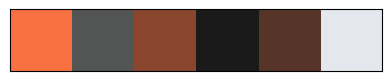

In [2]:
packt_palette = ["#f97141","#535555", "#89452D", "#1a1a1a",  "#573428",    "#E4E7ED"]

def custom_palette(custom_colors):
    packt = sns.set_palette(sns.color_palette(custom_colors))
    sns.palplot(sns.color_palette(custom_colors),size=0.8)
    plt.tick_params(axis='both', labelsize=0, length = 0)

custom_palette(packt_palette)

In [3]:
# label dataset features

column_names = ['duration',
                'protocol_type',
                'service',
                'flag',
                'src_bytes',
                'dst_bytes',
                'land',
                'wrong_fragment',
                'urgent',
                'hot',
                'num_failed_logins',
                'logged_in',
                'num_compromised',
                'root_shell',
                'su_attempted',
                'num_root',
                'num_file_creations',
                'num_shells',
                'num_access_files',
                'num_outbound_cmds',
                'is_host_login',
                'is_guest_login',
                'count',
                'srv_count',
                'serror_rate',
                'srv_serror_rate',
                'rerror_rate',
                'srv_rerror_rate',
                'same_srv_rate',
                'diff_srv_rate',
                'srv_diff_host_rate',
                'dst_host_count',
                'dst_host_srv_count',
                'dst_host_same_srv_rate',
                'dst_host_diff_srv_rate',
                'dst_host_same_src_port_rate',
                'dst_host_srv_diff_host_rate',
                'dst_host_serror_rate',
                'dst_host_srv_serror_rate',
                'dst_host_rerror_rate',
                'dst_host_srv_rerror_rate',
                'output'
               ]

In [4]:
sample_df = pd.read_csv('dataset/sample_data.csv', names=column_names, header=None)
df = pd.read_csv('dataset/dataset.csv', names=column_names, header=None)
df_feat = df

In [5]:
sample_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,output
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [6]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,output
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [7]:
# data-type verification of each column in dataset

df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [8]:
df['land'] = df['land'].astype('object')
df['logged_in'] = df['logged_in'].astype('object')
df['is_host_login'] = df['is_host_login'].astype('object')
df['is_guest_login'] = df['is_guest_login'].astype('object')

In [9]:
# finding NaN and null values in dataset

df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [10]:
print('Shape of 10 % dataset -',sample_df.shape,'\n------------------')
print('Shape of full dataset -',df.shape)

Shape of 10 % dataset - (494021, 42) 
------------------
Shape of full dataset - (4898431, 42)


## Analysis of Categorical Variables in 10% of dataset

### Count and plot of types of protocols used for connection

In [11]:
sample_df['protocol_type'].value_counts()

icmp    283602
tcp     190065
udp      20354
Name: protocol_type, dtype: int64

Text(0, 0.5, 'Count')

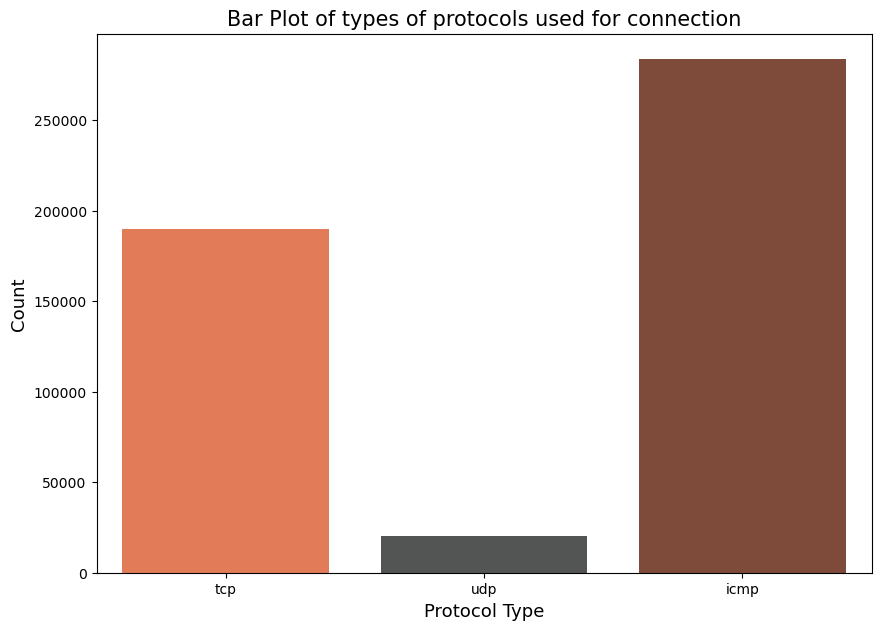

In [12]:
plt.figure(figsize=(10, 7))
sns.countplot(x='protocol_type', data=sample_df, palette=packt_palette)
plt.title('Bar Plot of types of protocols used for connection', size=15)
plt.xlabel('Protocol Type', size=13)
plt.ylabel('Count', size=13)

### Services used to request connection onto the server

In [13]:
print('Services used to request connection onto the server\n------------------')
print(sample_df['service'].value_counts())

Services used to request connection onto the server
------------------
ecr_i      281400
private    110893
http        64293
smtp         9723
other        7237
            ...  
X11            11
tim_i           7
pm_dump         1
tftp_u          1
red_i           1
Name: service, Length: 66, dtype: int64


In [14]:
print('Number of unique services used for connection -',sample_df['service'].nunique())

Number of unique services used for connection - 66


### Count and Plot of all flags for different connections

In [15]:
print('Count of all flags for different connections\n------------------')
print(sample_df['flag'].value_counts())

Count of all flags for different connections
------------------
SF        378440
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: flag, dtype: int64


Text(0, 0.5, 'Count')

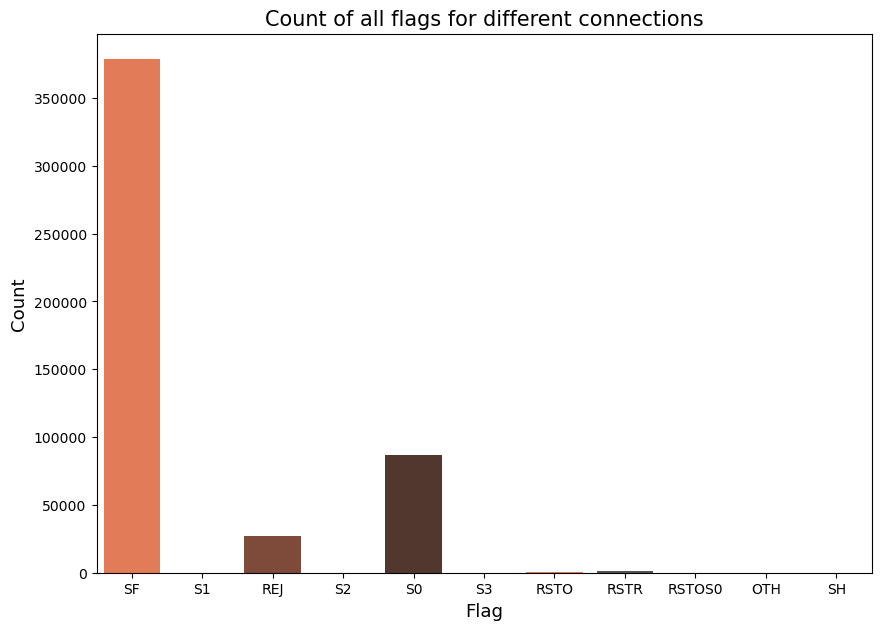

In [16]:
plt.figure(figsize=(10, 7))
sns.countplot(x='flag', data=sample_df, palette=packt_palette)
plt.title('Count of all flags for different connections', size=15)
plt.xlabel('Flag', size=13)
plt.ylabel('Count', size=13)

In [17]:
sample_df['land'].value_counts()

0    493999
1        22
Name: land, dtype: int64

### Count and Plot of login status for connections

In [18]:
print('Login status for connection requests\n------------------\n 0 = Logged In, 1 = Logged Out\n------------------')
print(sample_df['logged_in'].value_counts())

Login status for connection requests
------------------
 0 = Logged In, 1 = Logged Out
------------------
0    420784
1     73237
Name: logged_in, dtype: int64


Text(0, 0.5, 'Count')

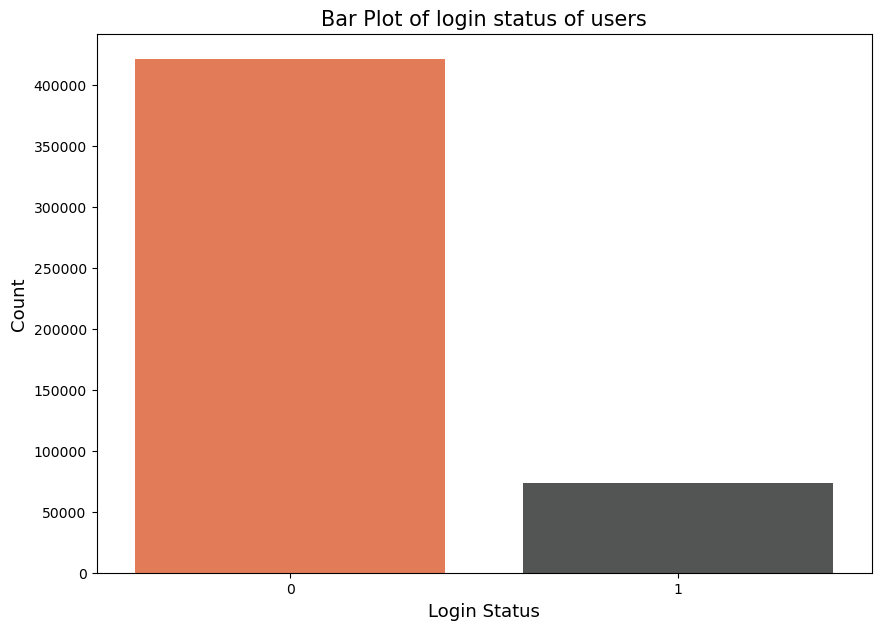

In [19]:
plt.figure(figsize=(10, 7))
sns.countplot(x='logged_in', data=sample_df, palette=packt_palette)
plt.title('Bar Plot of login status of users', size=15)
plt.xlabel('Login Status', size=13)
plt.ylabel('Count', size=13)

In [20]:
print('Number of connections with host login\n------------------')
print(sample_df['is_host_login'].value_counts())

Number of connections with host login
------------------
0    494021
Name: is_host_login, dtype: int64


In [21]:
print('Number of connections with guest login\n------------------')
print(sample_df['is_guest_login'].value_counts())

Number of connections with guest login
------------------
0    493336
1       685
Name: is_guest_login, dtype: int64


### Count and Plot of types of connections requests/intrusions

In [22]:
print('Count of connection requests/intrusions\n------------------')
sample_df['output'].value_counts()

Count of connection requests/intrusions
------------------


smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: output, dtype: int64

Text(0, 0.5, 'Count')

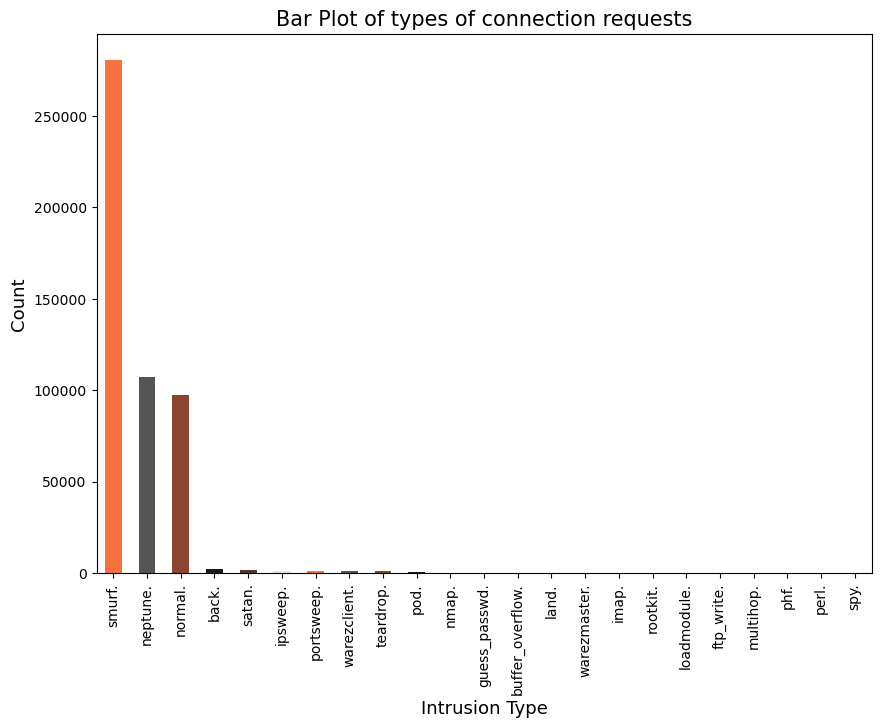

In [23]:
plt.figure(figsize=(10, 7))
sample_df['output'].value_counts().plot(kind='bar', color=packt_palette)
plt.title('Bar Plot of types of connection requests', size=15)
plt.xlabel('Intrusion Type', size=13)
plt.ylabel('Count', size=13)

### Heatmap of correlation between categorical variables in the sample dataset

In [24]:
cat_var = sample_df.select_dtypes('object').columns
num_var = sample_df.select_dtypes(np.number).columns

<AxesSubplot:>

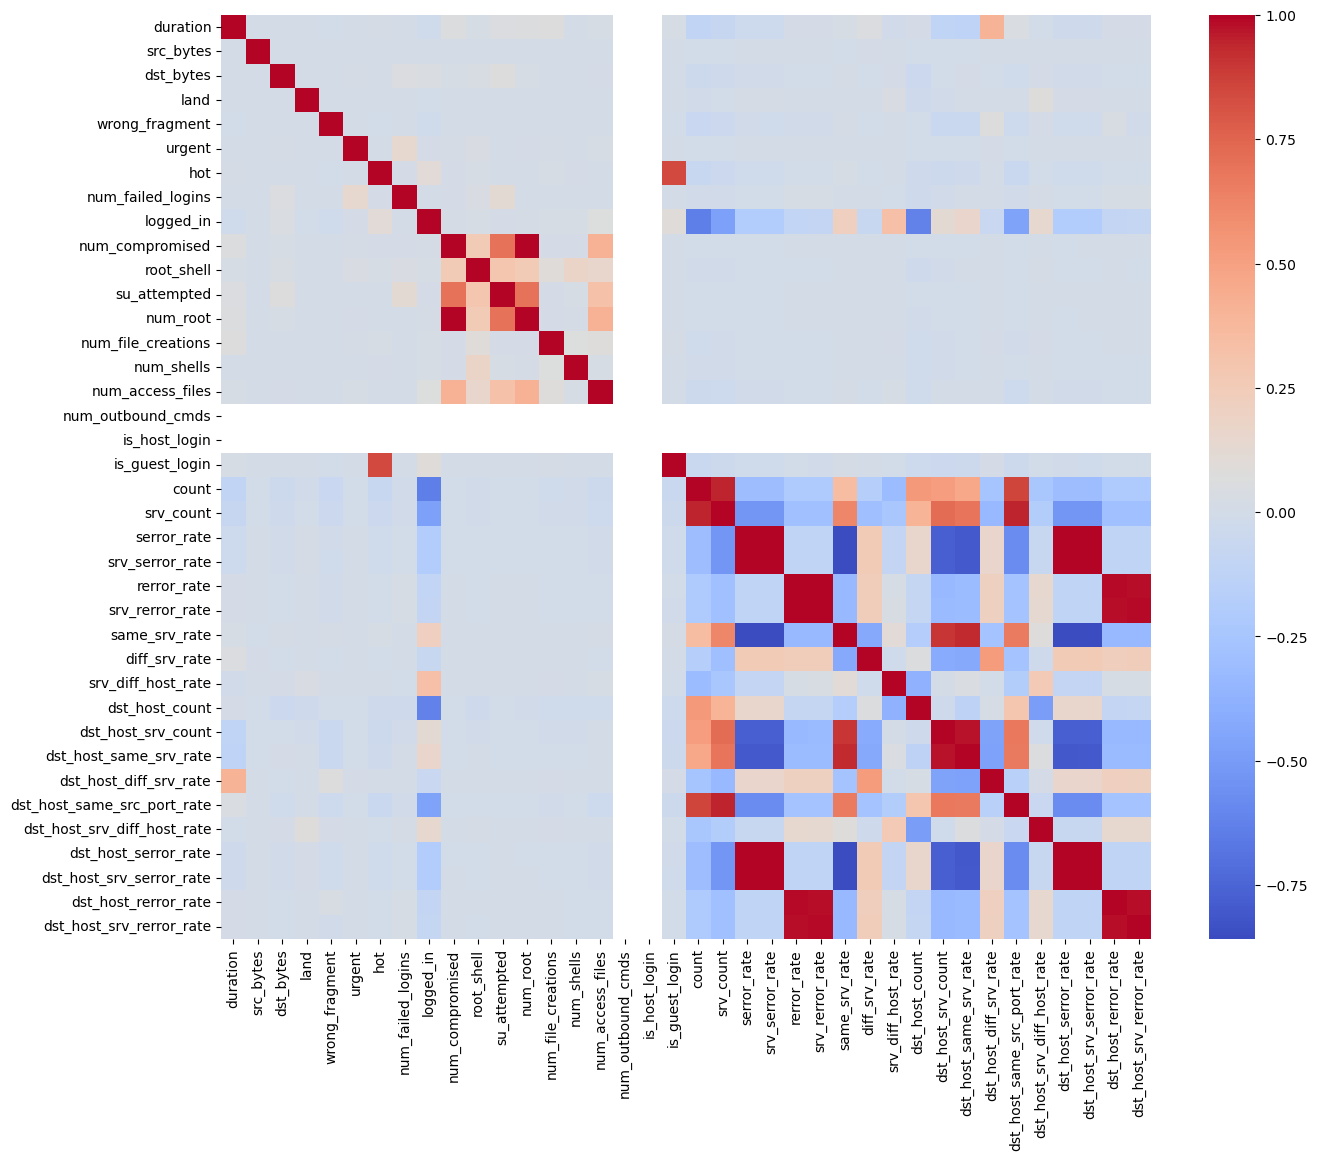

In [25]:
cor = sample_df.select_dtypes(np.number).corr()
fg,ax = plt.subplots(figsize = (15,12) )
sns.heatmap(cor, ax = ax, cmap='coolwarm')

## Analysis of continuous variables in 10% dataset

In [26]:
sample_df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Histogram Plot for duration

Text(0.5, 1.0, 'Histogram for duration')

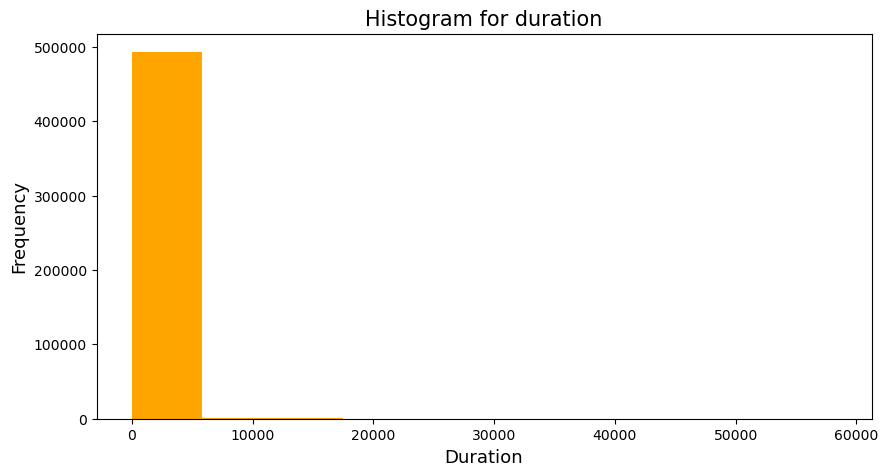

In [27]:
plt.figure(figsize=(10, 5))
plt.hist(sample_df['duration'], color='orange')
plt.xlabel('Duration', size=13)
plt.ylabel('Frequency', size=13)
plt.title('Histogram for duration', size=15)

- **The distribution of duration is highly skewed towards left. Majority of the values lie between 0 and 5000.**

#### Histogram Plot for duration from 0 to 6000

Text(0.5, 1.0, 'Histogram for duration (0 to 6000)')

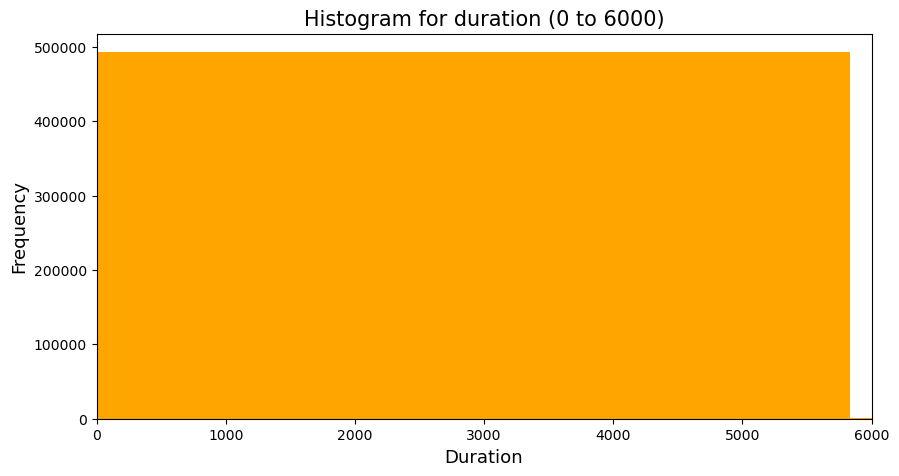

In [28]:
plt.figure(figsize=(10, 5))
plt.hist(sample_df['duration'], color='Orange')
plt.xlim(0, 6000)
plt.xlabel('Duration', size=13)
plt.ylabel('Frequency', size=13)
plt.title('Histogram for duration (0 to 6000)', size=15)

#### Histogram Plot for duration 6000 to 15000

Text(0.5, 1.0, 'Histogram for duration (6000 to 15000)')

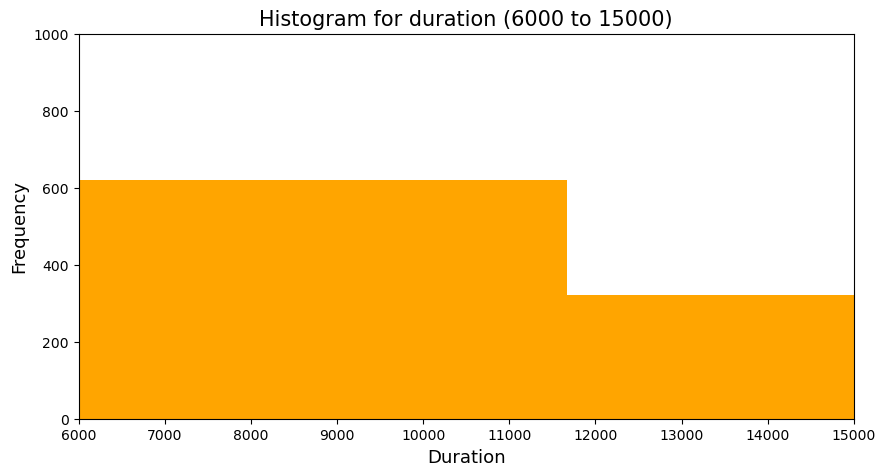

In [29]:
plt.figure(figsize=(10, 5))
plt.hist(sample_df['duration'], color='Orange')
plt.xlim(6000, 15000)
plt.ylim(0, 1000)
plt.xlabel('Duration', size=13)
plt.ylabel('Frequency', size=13)
plt.title('Histogram for duration (6000 to 15000)', size=15)

#### Histogram Plot of duration from 15000 to 30000

Text(0.5, 1.0, 'Histogram for duration (15000 to 30000)')

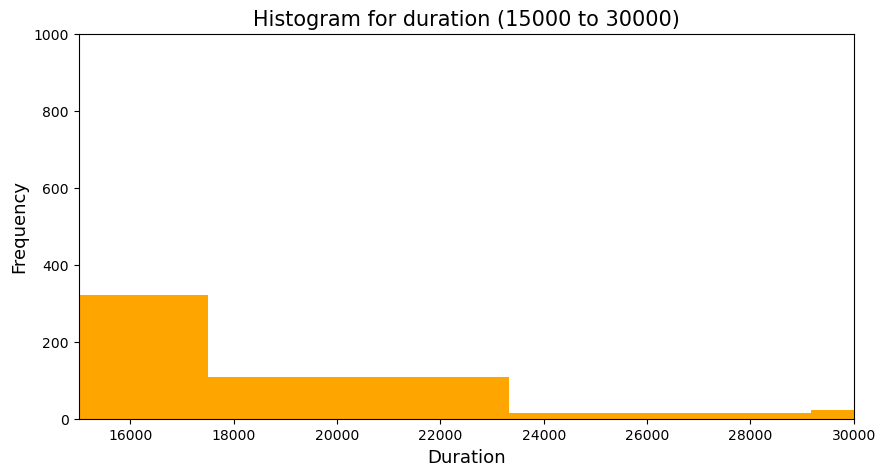

In [30]:
plt.figure(figsize=(10, 5))
plt.hist(sample_df['duration'], color='orange')
plt.xlim(15000, 30000)
plt.ylim(0, 1000)
plt.xlabel('Duration', size=13)
plt.ylabel('Frequency', size=13)
plt.title('Histogram for duration (15000 to 30000)', size=15)

#### Histogram Plot for duration from 30000 to 59000

Text(0.5, 1.0, 'Histogram for duration (30000 to 58329)')

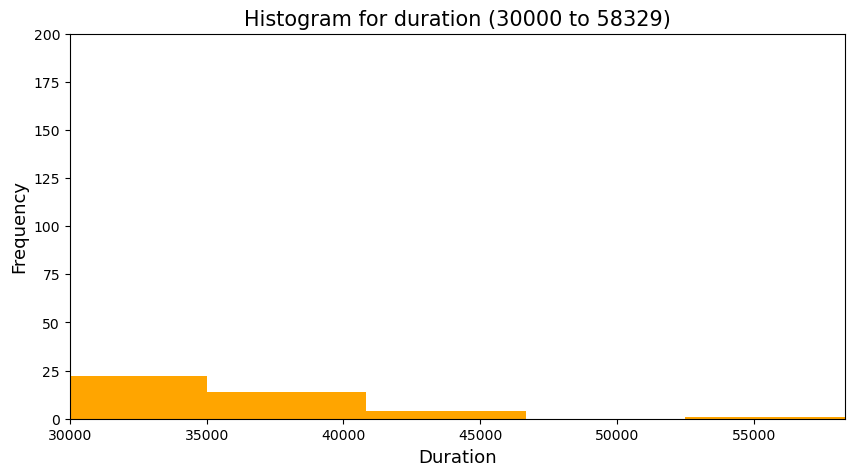

In [31]:
plt.figure(figsize=(10, 5))
plt.hist(sample_df['duration'], color='orange')
plt.xlim(30000, 58329)
plt.ylim(0, 200)
plt.xlabel('Duration', size=13)
plt.ylabel('Frequency', size=13)
plt.title('Histogram for duration (30000 to 58329)', size=15)

### Histogram Plot for source bytes

Text(0.5, 1.0, 'Histogram for Source Bytes')

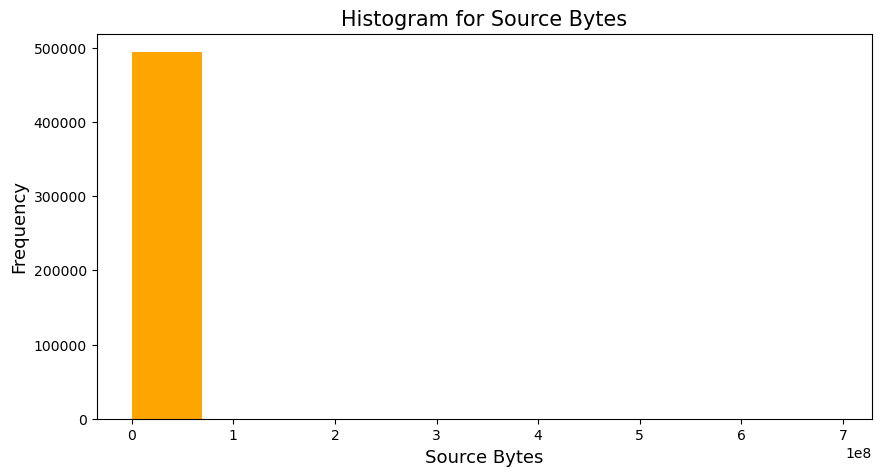

In [32]:
plt.figure(figsize=(10, 5))
plt.hist(sample_df['src_bytes'], color='orange')
plt.xlabel('Source Bytes', size=13)
plt.ylabel('Frequency', size=13)
plt.title('Histogram for Source Bytes', size=15)

- **Major frequency of the source bytes lie between 0 and 100,000,000.**

### Histogram Plot for destination bytes

Text(0.5, 1.0, 'Histogram for Destination Bytes')

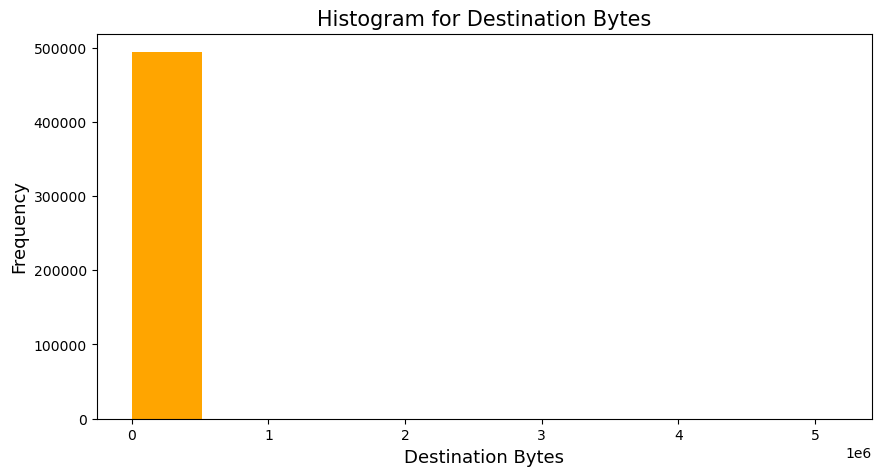

In [33]:
plt.figure(figsize=(10, 5))
plt.hist(sample_df['dst_bytes'], color='orange')
plt.xlabel('Destination Bytes', size=13)
plt.ylabel('Frequency', size=13)
plt.title('Histogram for Destination Bytes', size=15)

- **Major frequency of destination bytes lie between 0 and 1,000,000.**

#### Histogram Plot for destination bytes from 0 to 600,000

Text(0.5, 1.0, 'Histogram for Destination Bytes (0 to 600000)')

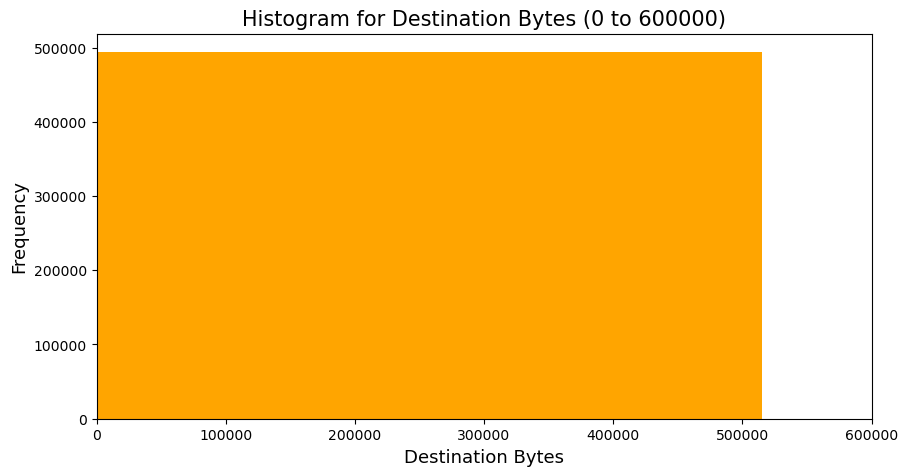

In [34]:
plt.figure(figsize=(10, 5))
plt.hist(sample_df['dst_bytes'], color='orange')
plt.xlim(0, 600000)
plt.xlabel('Destination Bytes', size=13)
plt.ylabel('Frequency', size=13)
plt.title('Histogram for Destination Bytes (0 to 600000)', size=15)

#### Histogram Plot for destination types from 600,000 to 1,000,000

Text(0.5, 1.0, 'Histogram for Destination Bytes (600000 to 1000000)')

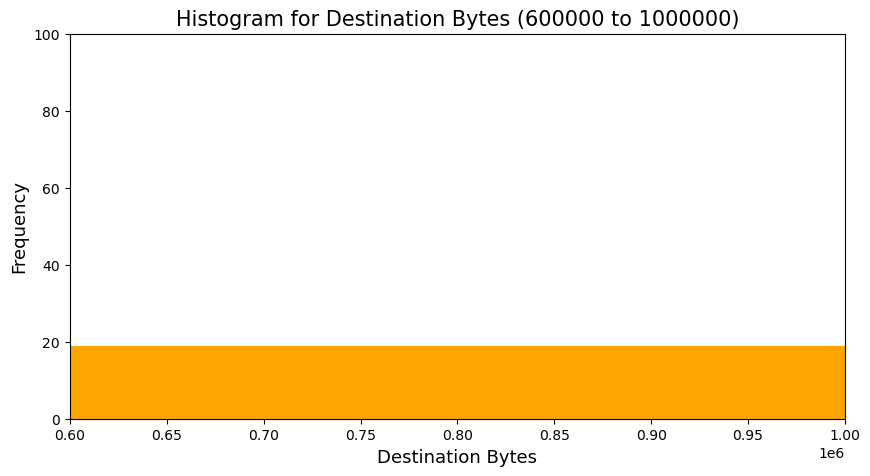

In [35]:
plt.figure(figsize=(10, 5))
plt.hist(sample_df['dst_bytes'], color='orange')
plt.xlim(600000, 1000000)
plt.ylim(0, 100)
plt.xlabel('Destination Bytes', size=13)
plt.ylabel('Frequency', size=13)
plt.title('Histogram for Destination Bytes (600000 to 1000000)', size=15)

### Histogram Plot for hot 

Text(0.5, 1.0, 'Histogram Plot for hot')

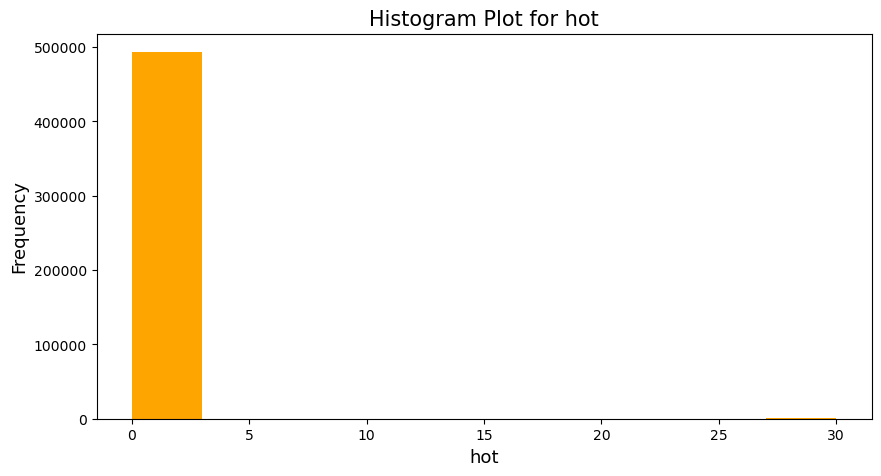

In [36]:
plt.figure(figsize=(10, 5))
plt.hist(sample_df['hot'], color='orange')
#plt.xlim(0, 10)
plt.xlabel('hot', size=13)
plt.ylabel('Frequency', size=13)
plt.title('Histogram Plot for hot', size=15)

#### Histogram Plot for hot for values between 0 and 10

Text(0.5, 1.0, 'Histogram Plot for hot for values between 0 and 10')

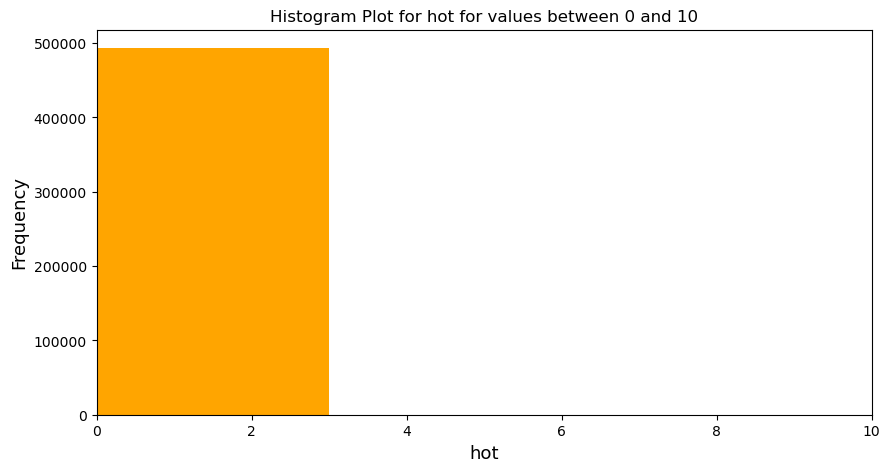

In [37]:
plt.figure(figsize=(10, 5))
plt.hist(sample_df['hot'], color='orange')
plt.xlim(0, 10)
plt.xlabel('hot', size=13)
plt.ylabel('Frequency', size=13)
plt.title('Histogram Plot for hot for values between 0 and 10')

#### Histogram Plot of hot for values between 10 to 30

Text(0.5, 1.0, 'Histogram Plot for values between 10 to 30')

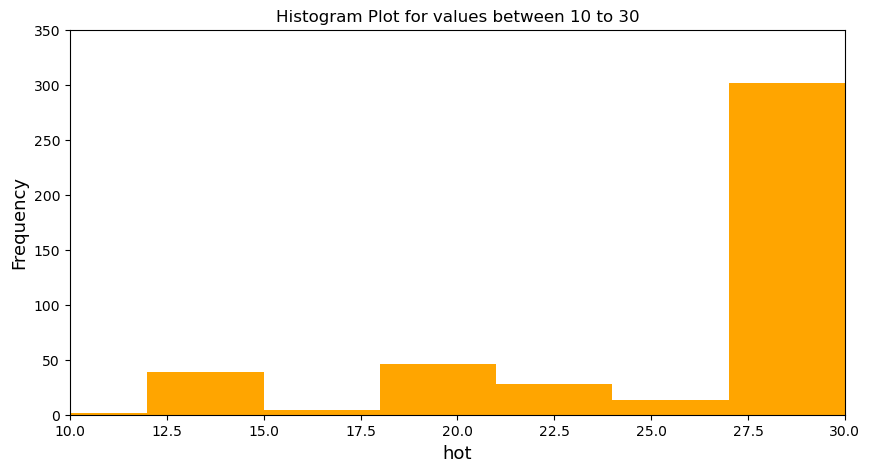

In [38]:
plt.figure(figsize=(10, 5))
plt.hist(sample_df['hot'], color='orange')
plt.xlim(10, 30)
plt.ylim(0, 350)
plt.xlabel('hot', size=13)
plt.ylabel('Frequency', size=13)
plt.title('Histogram Plot for values between 10 to 30')

### Histogram Plot for num_compromised

Text(0.5, 1.0, 'Histogram Plot for num_compromised')

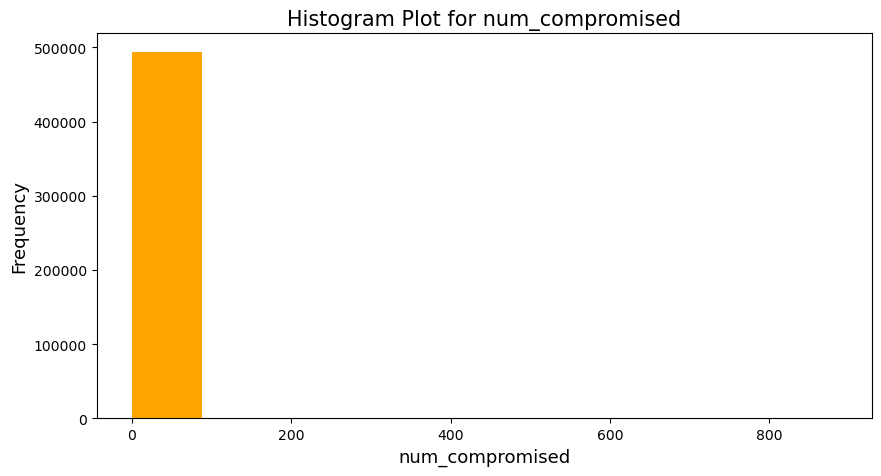

In [39]:
plt.figure(figsize=(10, 5))
plt.hist(sample_df['num_compromised'], color='orange')
plt.xlabel('num_compromised', size=13)
plt.ylabel('Frequency', size=13)
plt.title('Histogram Plot for num_compromised', size=15)

#### Histogram Plot for num_compromised for values between 0 and 100

Text(0.5, 1.0, 'Histogram Plot for num_compromised for values between 0 and 100')

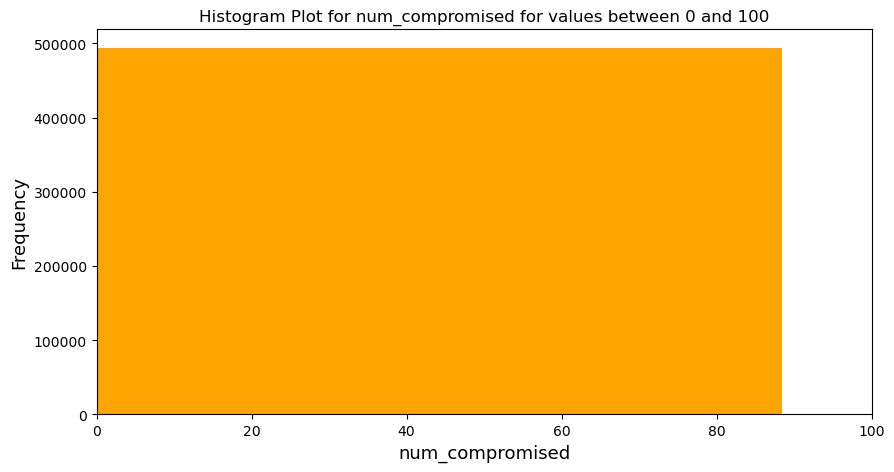

In [40]:
plt.figure(figsize=(10, 5))
plt.hist(sample_df['num_compromised'], color='orange')
plt.xlim(0, 100)
plt.xlabel('num_compromised', size=13)
plt.ylabel('Frequency', size=13)
plt.title('Histogram Plot for num_compromised for values between 0 and 100')

#### Histogram Plot for num_compromised for values greater than 100

Text(0.5, 1.0, 'Histogram Plot for num_compromised for values greater than 100')

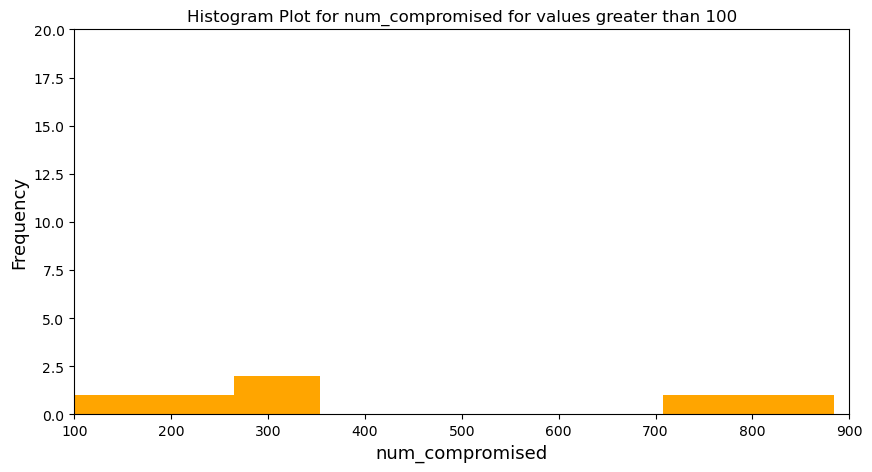

In [41]:
plt.figure(figsize=(10, 5))
plt.hist(sample_df['num_compromised'], color='orange')
plt.xlim(100, 900)
plt.ylim(0, 20)
plt.xlabel('num_compromised', size=13)
plt.ylabel('Frequency', size=13)
plt.title('Histogram Plot for num_compromised for values greater than 100')

### Histogram Plot for Root Shell

Text(0.5, 1.0, 'Histogram Plot for Root Shell')

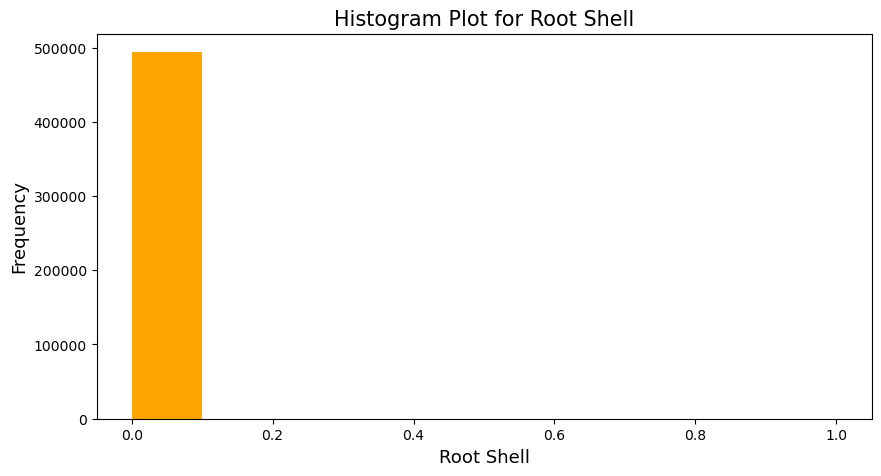

In [42]:
plt.figure(figsize=(10, 5))
plt.hist(sample_df['root_shell'], color='orange')
plt.xlabel('Root Shell', size=13)
plt.ylabel('Frequency', size=13)
plt.title('Histogram Plot for Root Shell', size=15)

### Histogram Plot for Wrong Fragment

Text(0.5, 1.0, 'Histogram Plot for Wrong Fragment')

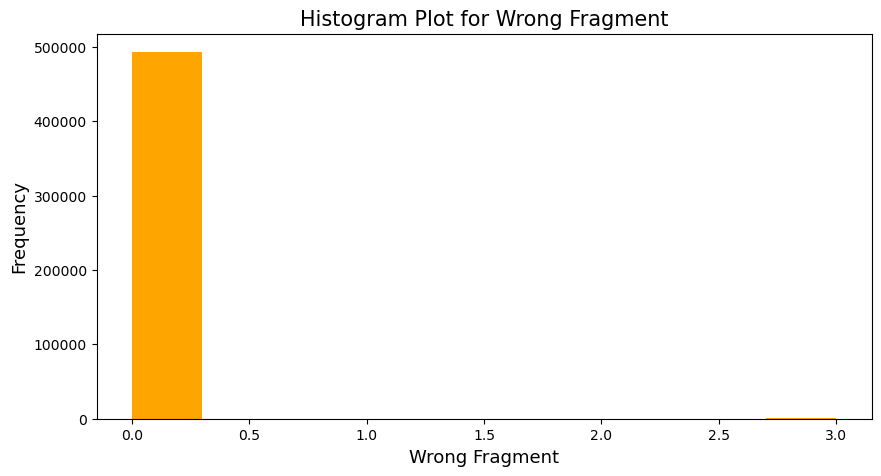

In [43]:
plt.figure(figsize=(10, 5))
plt.hist(sample_df['wrong_fragment'], color='orange')
plt.xlabel('Wrong Fragment', size=13)
plt.ylabel('Frequency', size=13)
plt.title('Histogram Plot for Wrong Fragment', size=15)

### Histogram Plot for Urgent

Text(0.5, 1.0, 'Histogram Plot for Urgent')

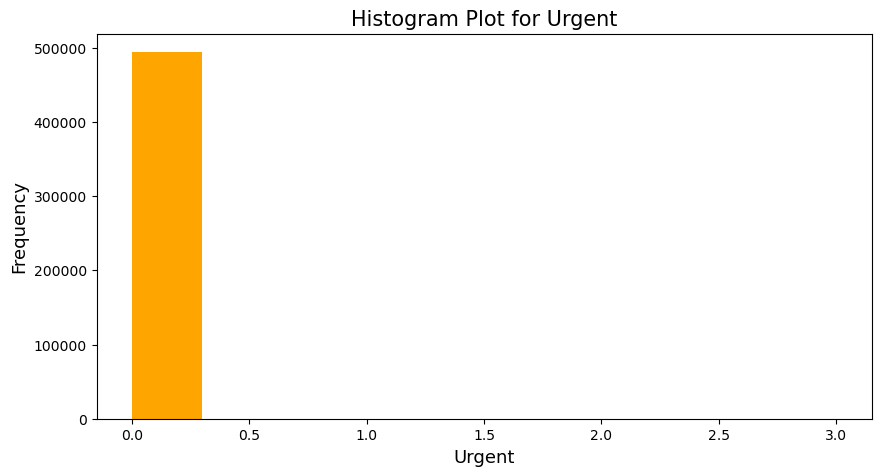

In [44]:
plt.figure(figsize=(10, 5))
plt.hist(sample_df['urgent'], color='orange')
plt.xlabel('Urgent', size=13)
plt.ylabel('Frequency', size=13)
plt.title('Histogram Plot for Urgent', size=15)

### Histogram Plot for su_attempted

Text(0.5, 1.0, 'Histogram Plot for su_attempted')

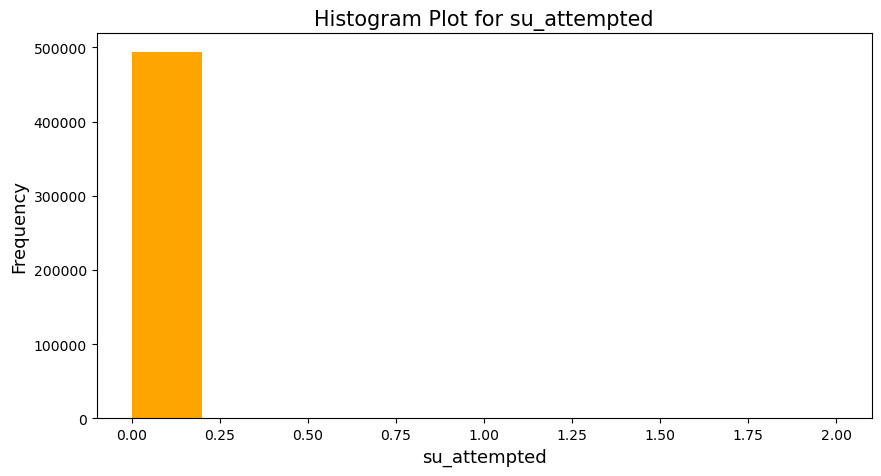

In [45]:
plt.figure(figsize=(10, 5))
plt.hist(sample_df['su_attempted'], color='orange')
plt.xlabel('su_attempted', size=13)
plt.ylabel('Frequency', size=13)
plt.title('Histogram Plot for su_attempted', size=15)

#### Histogram Plot for values of su_attempted between 0 and 0.25

Text(0.5, 1.0, 'Histogram Plot for values of su_attempted between 0 and 0.25')

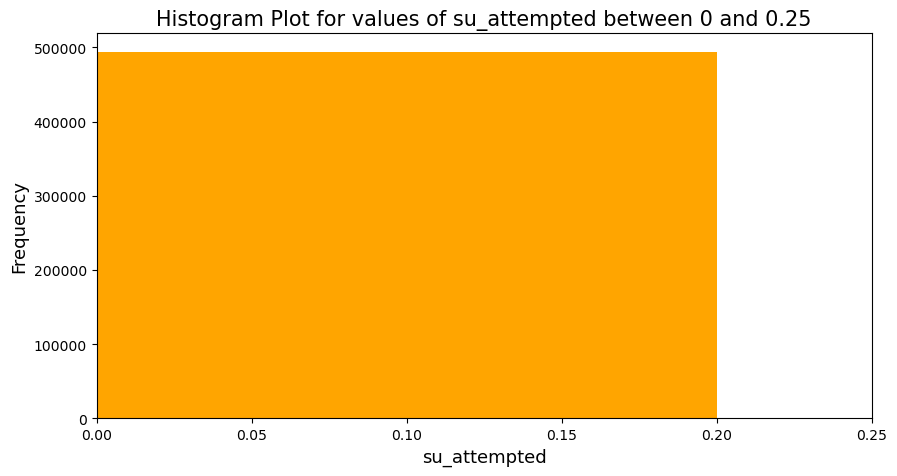

In [46]:
plt.figure(figsize=(10, 5))
plt.hist(sample_df['su_attempted'], color='orange')
plt.xlim(0, 0.25)
plt.xlabel('su_attempted', size=13)
plt.ylabel('Frequency', size=13)
plt.title('Histogram Plot for values of su_attempted between 0 and 0.25', size=15)

### Histogram Plot for dst_host_srv_count

Text(0.5, 1.0, 'Histogram Plot for dst_host_srv_count')

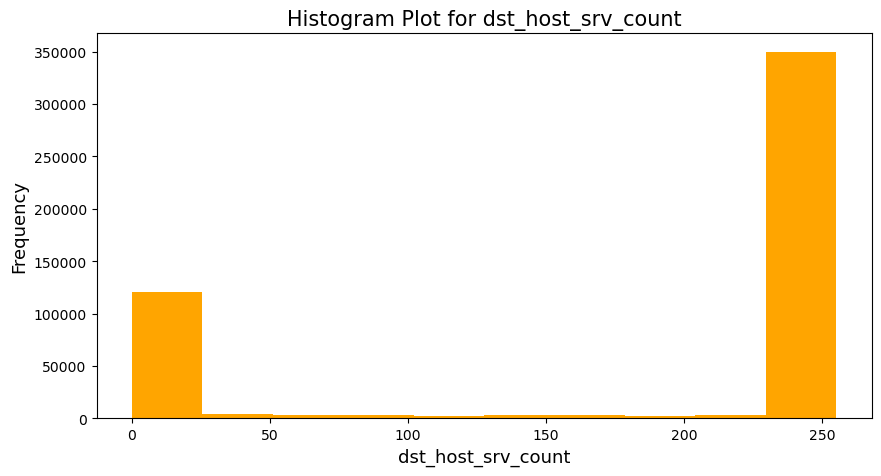

In [47]:
plt.figure(figsize=(10, 5))
plt.hist(sample_df['dst_host_srv_count'], color='orange')
plt.xlabel('dst_host_srv_count', size=13)
plt.ylabel('Frequency', size=13)
plt.title('Histogram Plot for dst_host_srv_count', size=15)

### Histogram Plot of dst_host_same_srv_rate

Text(0.5, 1.0, 'Histogram Plot of dst_host_same_srv_rate')

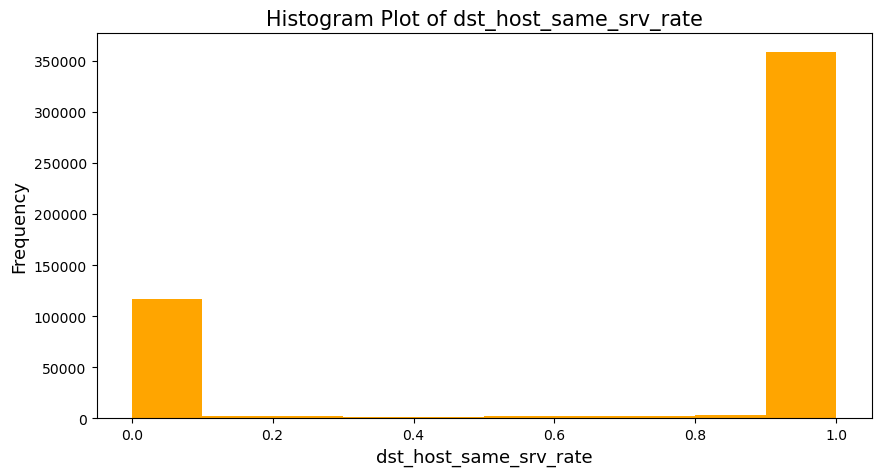

In [48]:
plt.figure(figsize=(10, 5))
plt.hist(sample_df['dst_host_same_srv_rate'], color='orange')
plt.xlabel('dst_host_same_srv_rate', size=13)
plt.ylabel('Frequency', size=13)
plt.title('Histogram Plot of dst_host_same_srv_rate', size=15)

### Histogram Plot for dst_host_diff_srv_rate

Text(0.5, 1.0, 'Histogram Plot for dst_host_diff_srv_rate')

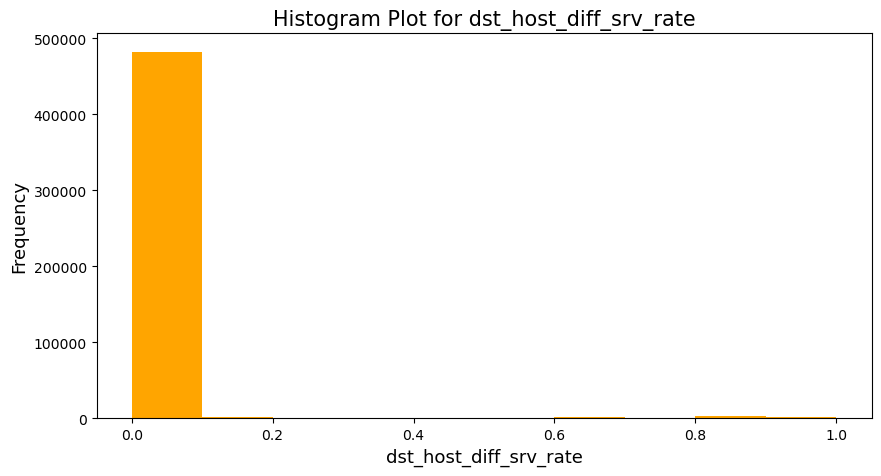

In [49]:
plt.figure(figsize=(10, 5))
plt.hist(sample_df['dst_host_diff_srv_rate'], color='orange')
plt.xlabel('dst_host_diff_srv_rate', size=13)
plt.ylabel('Frequency', size=13)
plt.title('Histogram Plot for dst_host_diff_srv_rate', size=15)

### Histogram Plot for dst_host_same_src_port_rate

Text(0.5, 1.0, 'Histogram Plot for dst_host_same_src_port_rate')

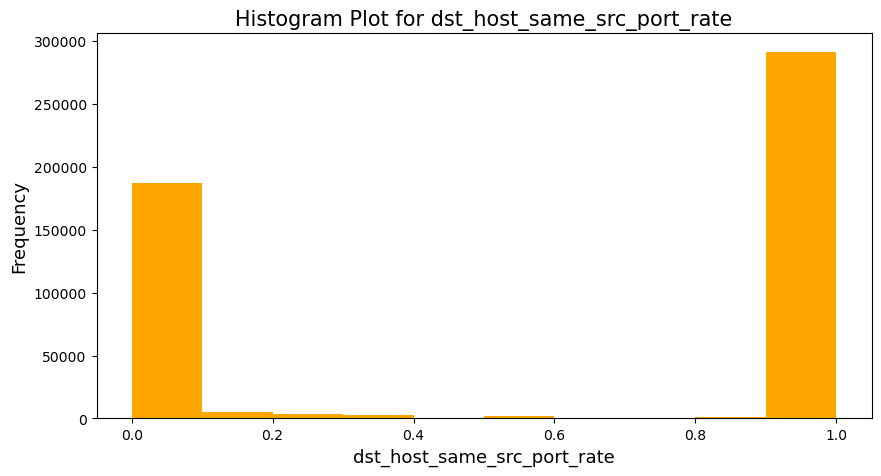

In [50]:
plt.figure(figsize=(10, 5))
plt.hist(sample_df['dst_host_same_src_port_rate'], color='orange')
plt.xlabel('dst_host_same_src_port_rate', size=13)
plt.ylabel('Frequency', size=13)
plt.title('Histogram Plot for dst_host_same_src_port_rate', size=15)

### Histogram Plot for dst_host_srv_diff_host_rate

Text(0.5, 1.0, 'Histogram Plot for dst_host_same_src_port_rate')

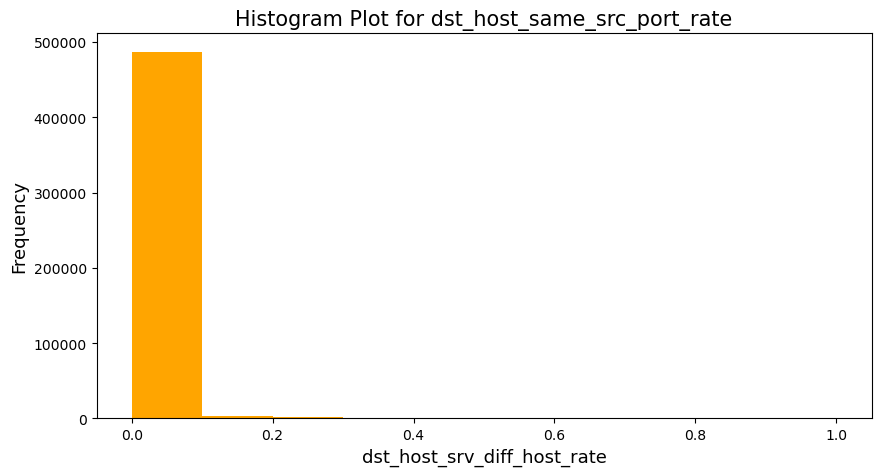

In [51]:
plt.figure(figsize=(10, 5))
plt.hist(sample_df['dst_host_srv_diff_host_rate'], color='orange')
plt.xlabel('dst_host_srv_diff_host_rate', size=13)
plt.ylabel('Frequency', size=13)
plt.title('Histogram Plot for dst_host_same_src_port_rate', size=15)

### Histogram Plot for dst_host_serror_rate

Text(0.5, 1.0, 'Histogram Plot for dst_host_serror_rate')

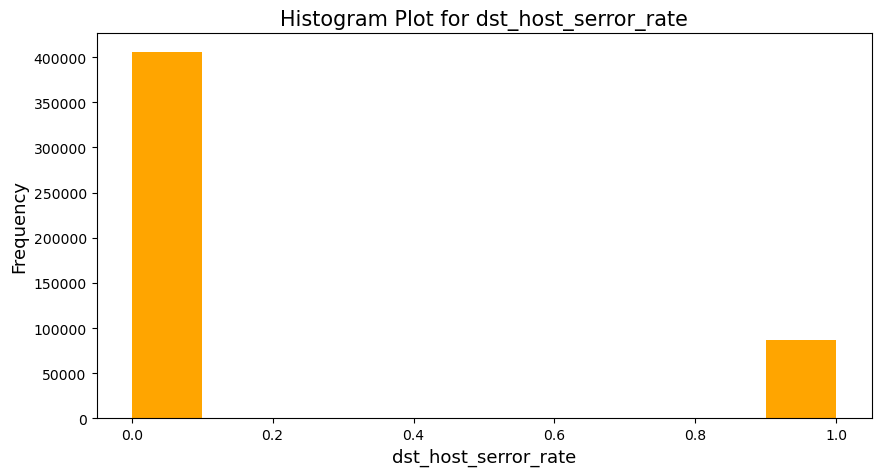

In [52]:
plt.figure(figsize=(10, 5))
plt.hist(sample_df['dst_host_serror_rate'], color='orange')
plt.xlabel('dst_host_serror_rate', size=13)
plt.ylabel('Frequency', size=13)
plt.title('Histogram Plot for dst_host_serror_rate', size=15)

### Histogram Plot for dst_host_srv_serror_rate

Text(0.5, 1.0, 'Histogram Plot for dst_host_srv_serror_rate')

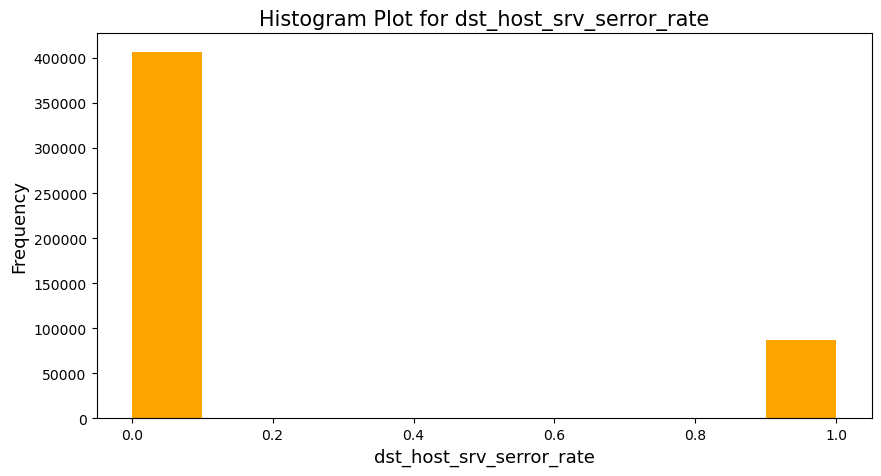

In [53]:
plt.figure(figsize=(10, 5))
plt.hist(sample_df['dst_host_srv_serror_rate'], color='orange')
plt.xlabel('dst_host_srv_serror_rate', size=13)
plt.ylabel('Frequency', size=13)
plt.title('Histogram Plot for dst_host_srv_serror_rate', size=15)

### Histogram Plot of dst_host_rerror_rate

Text(0.5, 1.0, 'Histogram Plot of dst_host_rerror_rate')

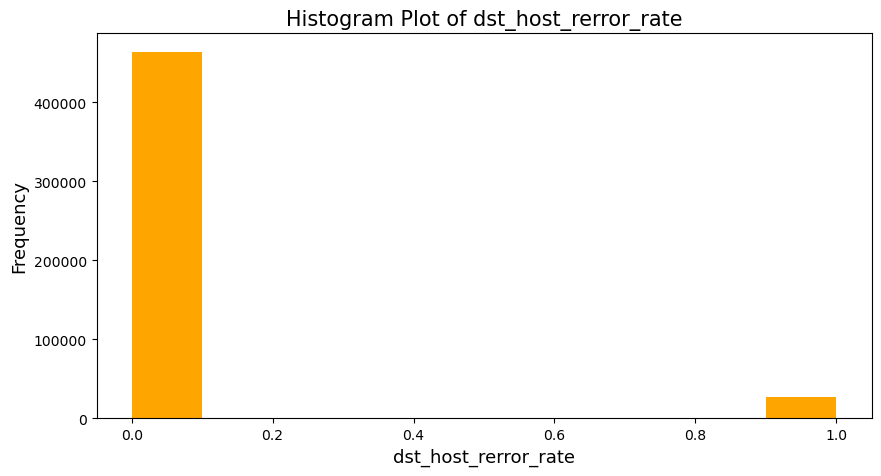

In [54]:
plt.figure(figsize=(10, 5))
plt.hist(sample_df['dst_host_rerror_rate'], color='orange')
plt.xlabel('dst_host_rerror_rate', size=13)
plt.ylabel('Frequency', size=13)
plt.title('Histogram Plot of dst_host_rerror_rate', size=15)

### Histogram Plot for dst_host_srv_rerror_rate

Text(0.5, 1.0, 'Histogram Plot for dst_host_srv_rerror_rate')

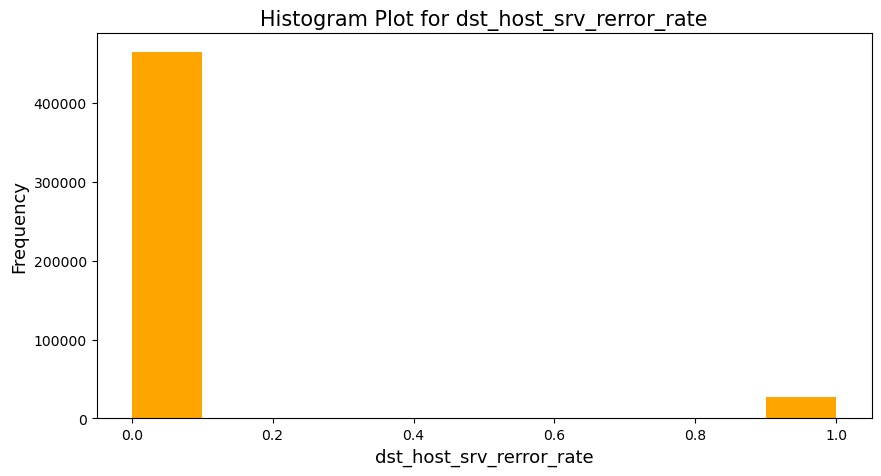

In [55]:
plt.figure(figsize=(10, 5))
plt.hist(sample_df['dst_host_srv_rerror_rate'], color='orange')
plt.xlabel('dst_host_srv_rerror_rate', size=13)
plt.ylabel('Frequency', size=13)
plt.title('Histogram Plot for dst_host_srv_rerror_rate', size=15)

### Histogram Plot for num_root

Text(0.5, 1.0, 'Histogram Plot for num_root')

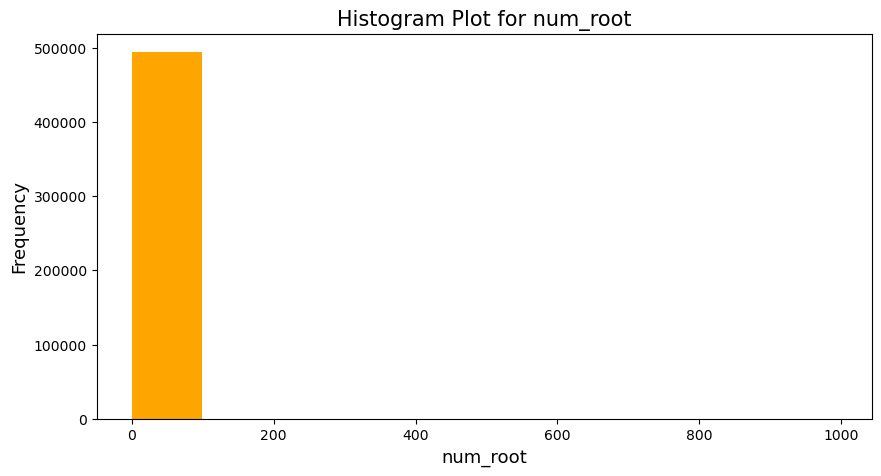

In [56]:
plt.figure(figsize=(10, 5))
plt.hist(sample_df['num_root'], color='orange')
plt.xlabel('num_root', size=13)
plt.ylabel('Frequency', size=13)
plt.title('Histogram Plot for num_root', size=15)

In [57]:
print('Maximum value for num_root is :', max(sample_df['num_root']),'\n------------------------------')
print('Maximum value for num_root is :', min(sample_df['num_root']))

Maximum value for num_root is : 993 
------------------------------
Maximum value for num_root is : 0


 ### Histogram Plot for num_file_creations

Text(0.5, 1.0, 'Histogram Plot for num_file_creations')

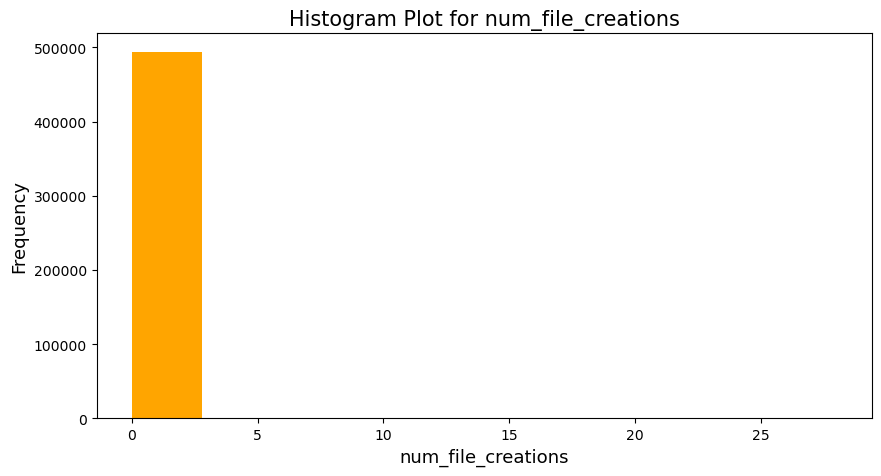

In [58]:
plt.figure(figsize=(10, 5))
plt.hist(sample_df['num_file_creations'], color='orange')
plt.xlabel('num_file_creations', size=13)
plt.ylabel('Frequency', size=13)
plt.title('Histogram Plot for num_file_creations', size=15)

### Histogram Plot for num_shells

Text(0.5, 1.0, 'Histogram Plot for num_shells')

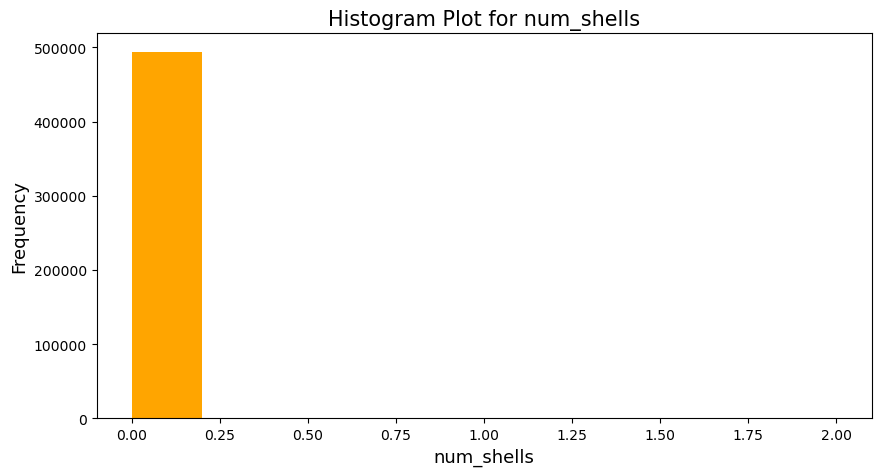

In [59]:
plt.figure(figsize=(10, 5))
plt.hist(sample_df['num_shells'], color='orange')
plt.xlabel('num_shells', size=13)
plt.ylabel('Frequency', size=13)
plt.title('Histogram Plot for num_shells', size=15)

### Histogram Plot for num_access_file

Text(0.5, 1.0, 'Histogram Plot for num_access_file')

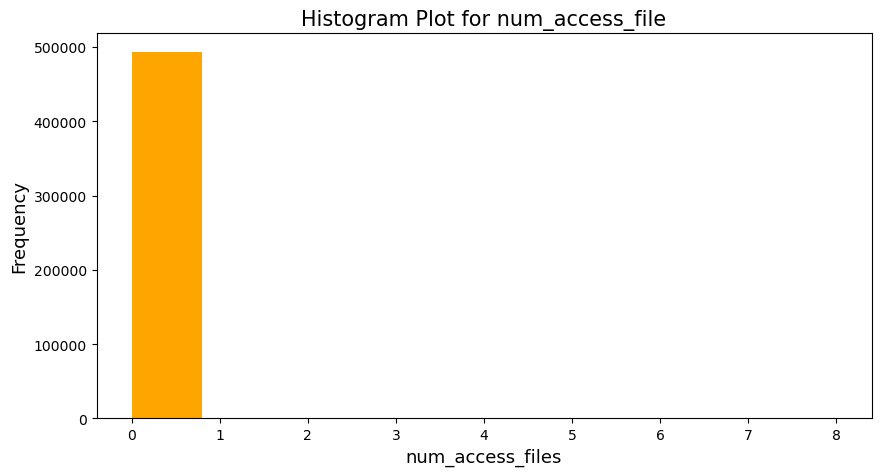

In [60]:
plt.figure(figsize=(10, 5))
plt.hist(sample_df['num_access_files'], color='orange')
plt.xlabel('num_access_files', size=13)
plt.ylabel('Frequency', size=13)
plt.title('Histogram Plot for num_access_file', size=15)

### Histogram Plot for num_outbound_cmds

Text(0.5, 1.0, 'Histogram Plot for num_outbound_cmds')

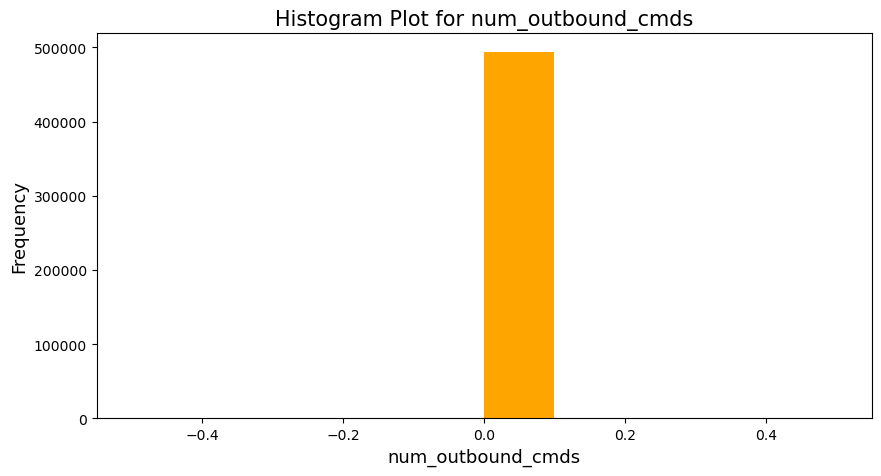

In [61]:
plt.figure(figsize=(10, 5))
plt.hist(sample_df['num_outbound_cmds'], color='orange')
plt.xlabel('num_outbound_cmds', size=13)
plt.ylabel('Frequency', size=13)
plt.title('Histogram Plot for num_outbound_cmds', size=15)

#### Histogram Plot for num_outbound_cmds for values between 0 and 0.2

Text(0.5, 1.0, 'Histogram Plot for num_outbound_cmds for values between 0 and 0.2')

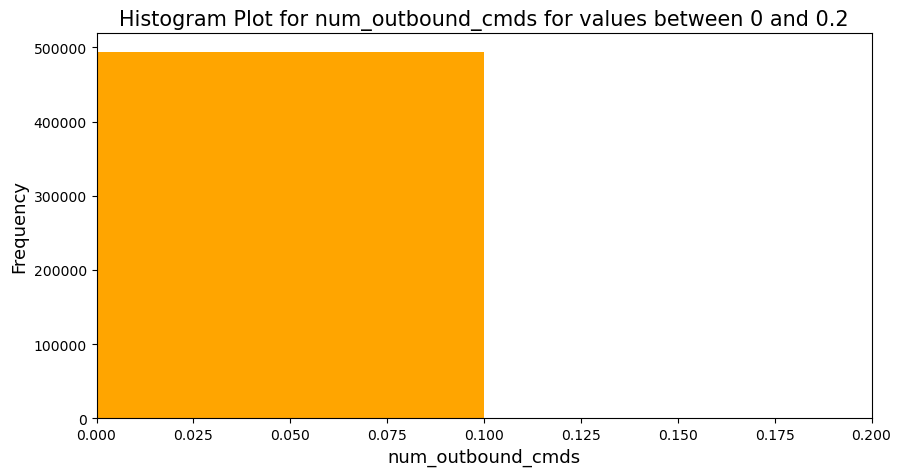

In [62]:
plt.figure(figsize=(10, 5))
plt.hist(sample_df['num_outbound_cmds'], color='orange')
plt.xlim(0, 0.2)
plt.xlabel('num_outbound_cmds', size=13)
plt.ylabel('Frequency', size=13)
plt.title('Histogram Plot for num_outbound_cmds for values between 0 and 0.2', size=15)

### Histogram Plot for count

Text(0.5, 1.0, 'Histogram Plot for count')

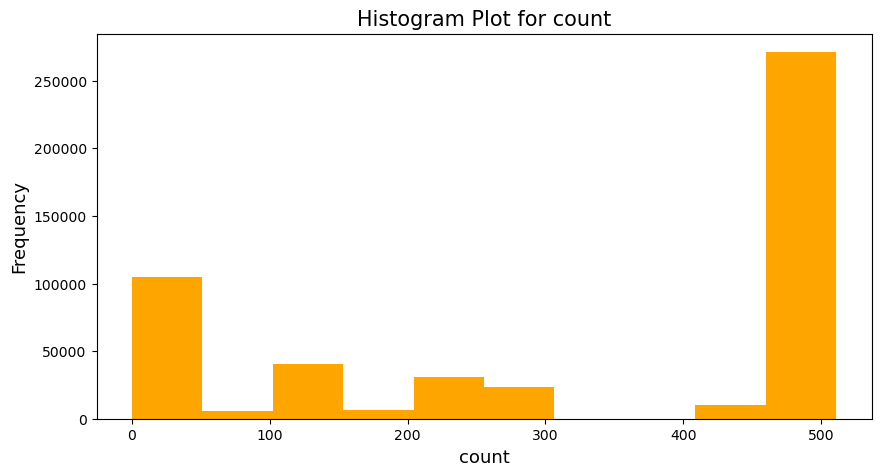

In [63]:
plt.figure(figsize=(10, 5))
plt.hist(sample_df['count'], color='orange')
plt.xlabel('count', size=13)
plt.ylabel('Frequency', size=13)
plt.title('Histogram Plot for count', size=15)

### Histogram Plot for srv_count

Text(0.5, 1.0, 'Histogram Plot for srv_count')

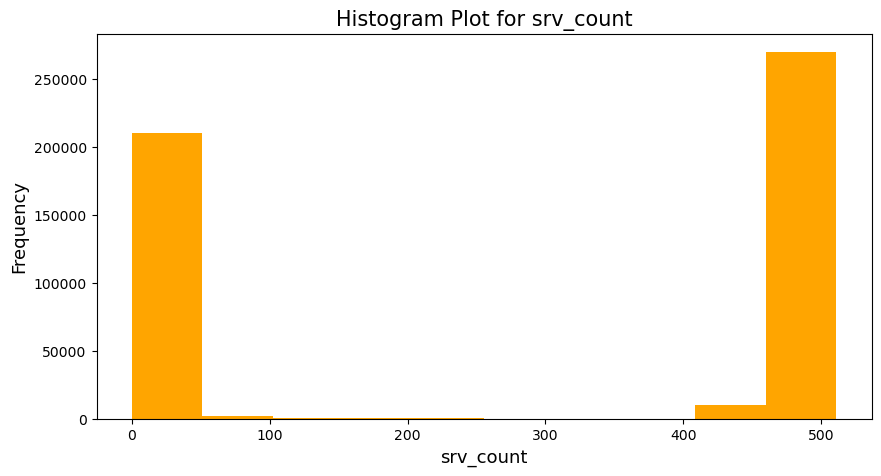

In [64]:
plt.figure(figsize=(10, 5))
plt.hist(sample_df['srv_count'], color='orange')
plt.xlabel('srv_count', size=13)
plt.ylabel('Frequency', size=13)
plt.title('Histogram Plot for srv_count', size=15)

### Histogram Plot for serror_rate

Text(0.5, 1.0, 'Histogram Plot for serror_rate')

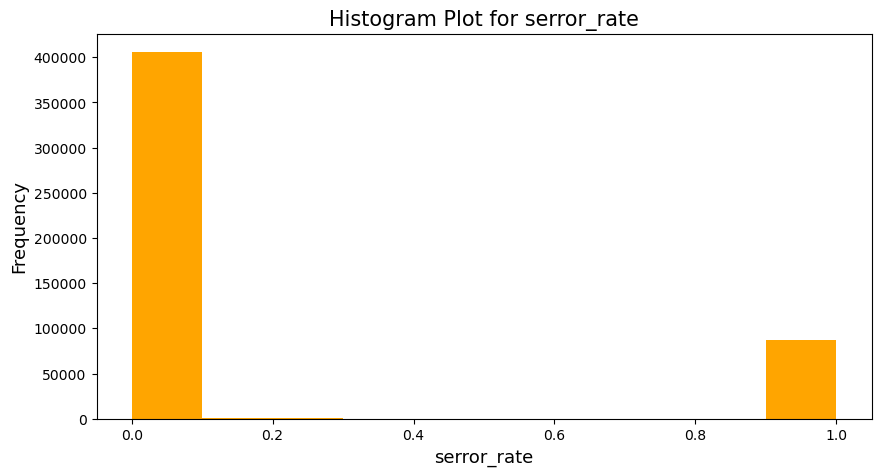

In [65]:
plt.figure(figsize=(10, 5))
plt.hist(sample_df['serror_rate'], color='orange')
plt.xlabel('serror_rate', size=13)
plt.ylabel('Frequency', size=13)
plt.title('Histogram Plot for serror_rate', size=15)

### Histogram Plot for srv_serror_rate

Text(0.5, 1.0, 'Histogram Plot for srv_serror_rate')

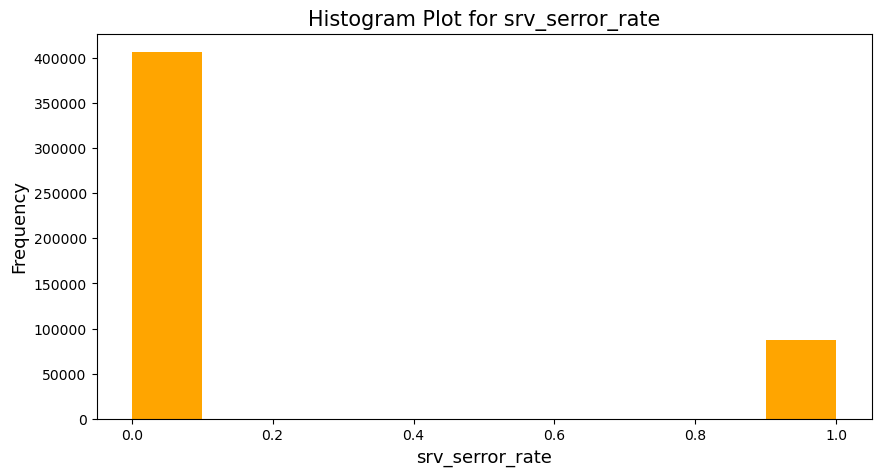

In [66]:
plt.figure(figsize=(10, 5))
plt.hist(sample_df['srv_serror_rate'], color='orange')
plt.xlabel('srv_serror_rate', size=13)
plt.ylabel('Frequency', size=13)
plt.title('Histogram Plot for srv_serror_rate', size=15)

### Histogram Plot for rerror_rate

Text(0.5, 1.0, 'Histogram Plot for rerror_rate')

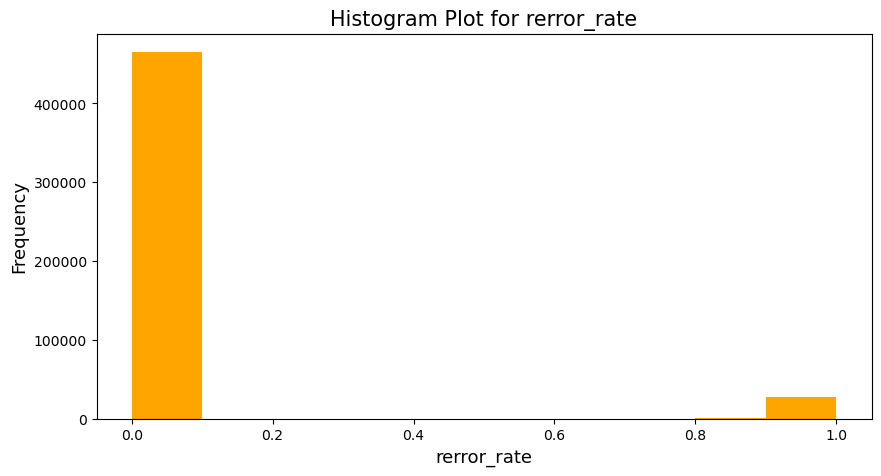

In [67]:
plt.figure(figsize=(10, 5))
plt.hist(sample_df['rerror_rate'], color='orange')
plt.xlabel('rerror_rate', size=13)
plt.ylabel('Frequency', size=13)
plt.title('Histogram Plot for rerror_rate', size=15)

### Histogram Plot for srv_rerror_rate

Text(0.5, 1.0, 'Histogram Plot for srv_rerror_rate')

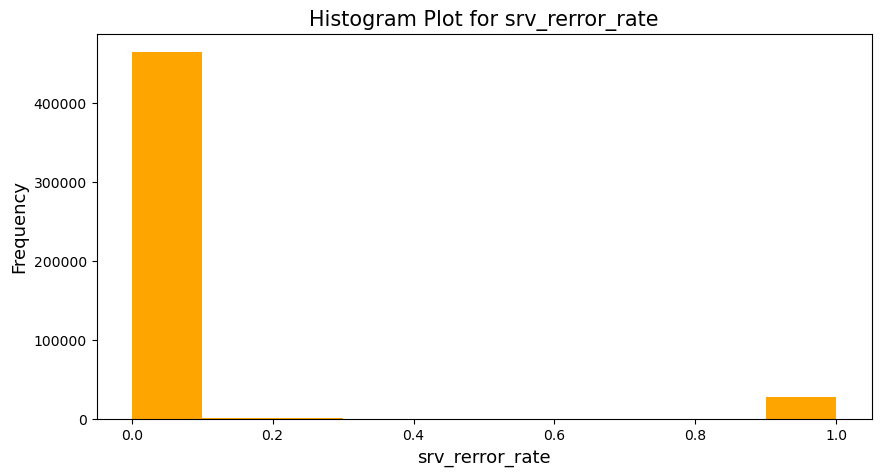

In [68]:
plt.figure(figsize=(10, 5))
plt.hist(sample_df['srv_rerror_rate'], color='orange')
plt.xlabel('srv_rerror_rate', size=13)
plt.ylabel('Frequency', size=13)
plt.title('Histogram Plot for srv_rerror_rate', size=15)

### Histogram Plot for same_srv_rate

Text(0.5, 1.0, 'Histogram Plot for same_srv_rate')

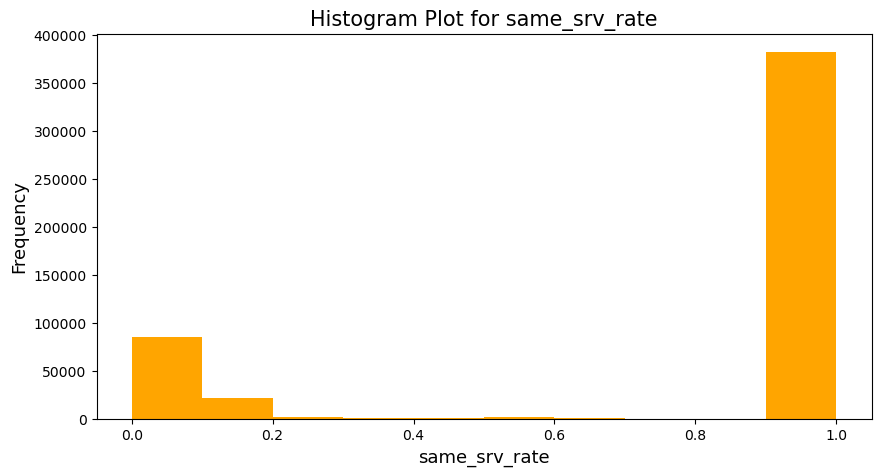

In [69]:
plt.figure(figsize=(10, 5))
plt.hist(sample_df['same_srv_rate'], color='orange')
plt.xlabel('same_srv_rate', size=13)
plt.ylabel('Frequency', size=13)
plt.title('Histogram Plot for same_srv_rate', size=15)

### Histogram Plot for diff_srv_rate

Text(0.5, 1.0, 'Histogram Plot for diff_srv_rate')

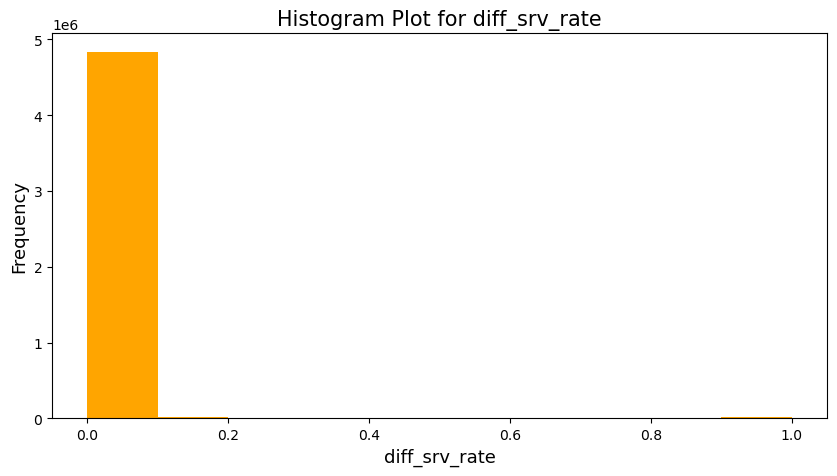

In [70]:
plt.figure(figsize=(10, 5))
plt.hist(df['diff_srv_rate'], color='orange')
plt.xlabel('diff_srv_rate', size=13)
plt.ylabel('Frequency', size=13)
plt.title('Histogram Plot for diff_srv_rate', size=15)

### Histogram Plot for srv_diff_host_rate

Text(0.5, 1.0, 'Histogram Plot for srv_diff_host_rate')

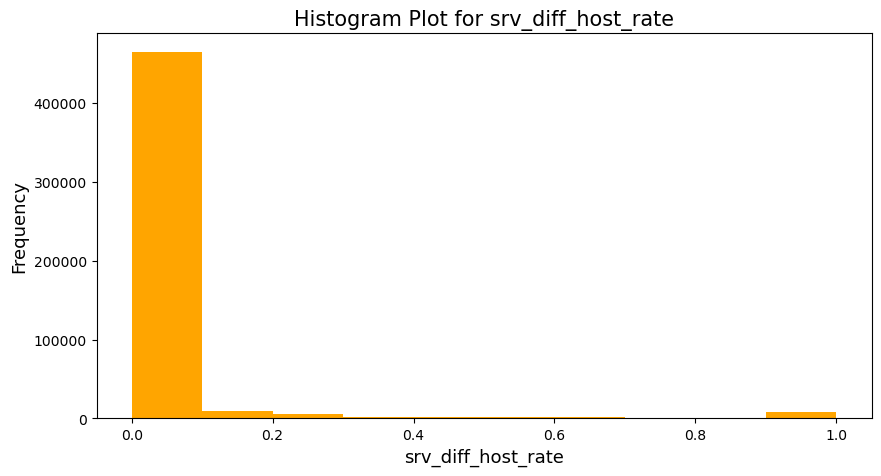

In [71]:
plt.figure(figsize=(10, 5))
plt.hist(sample_df['srv_diff_host_rate'], color='orange')
plt.xlabel('srv_diff_host_rate', size=13)
plt.ylabel('Frequency', size=13)
plt.title('Histogram Plot for srv_diff_host_rate', size=15)

## Conclusion from Anaylsis of categorical variables of 10% dataset

- **Dataset is highly skewed towards left. It needs to be balanced for the model to perform accurately.**

## Analysis of categorical variables of full dataset

### Classifying connection requests as threat or non-threat

In [72]:
# categorizing all connection requests other than normal as a threat

df['status'] = 'non-threat'
df['status'].loc[df.output != 'normal.'] = 'threat'

C:\Users\AnshulRanade\AppData\Local\Temp\ipykernel_7652\629836792.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['status'].loc[df.output != 'normal.'] = 'threat'


<AxesSubplot:title={'center':'Pie Plot of threat and non-threat connection requests'}, ylabel='status'>

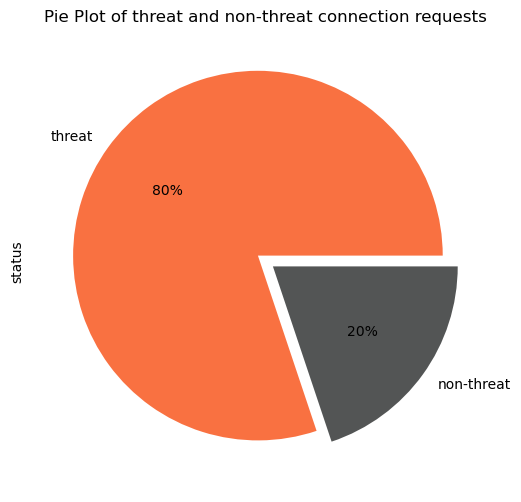

In [73]:
explode = (0.05, 0.05)
plt.title('Pie Plot of threat and non-threat connection requests')
df.status.value_counts().plot(kind = 'pie', figsize = (8,6), colors=packt_palette, autopct='%1.0f%%', explode = explode)

# under representation of non-threat status perhaps undersampling/oversampling techniques could help 

- **More than 80% of connection requests are flagged as a threat.**

### Pie plot between threat and non-threat connection requests coming via ICMP and UDP protocols

<AxesSubplot:title={'center':'Pie Plot between threat and non-threat status of connection requests for UDP protocol'}, ylabel='status'>

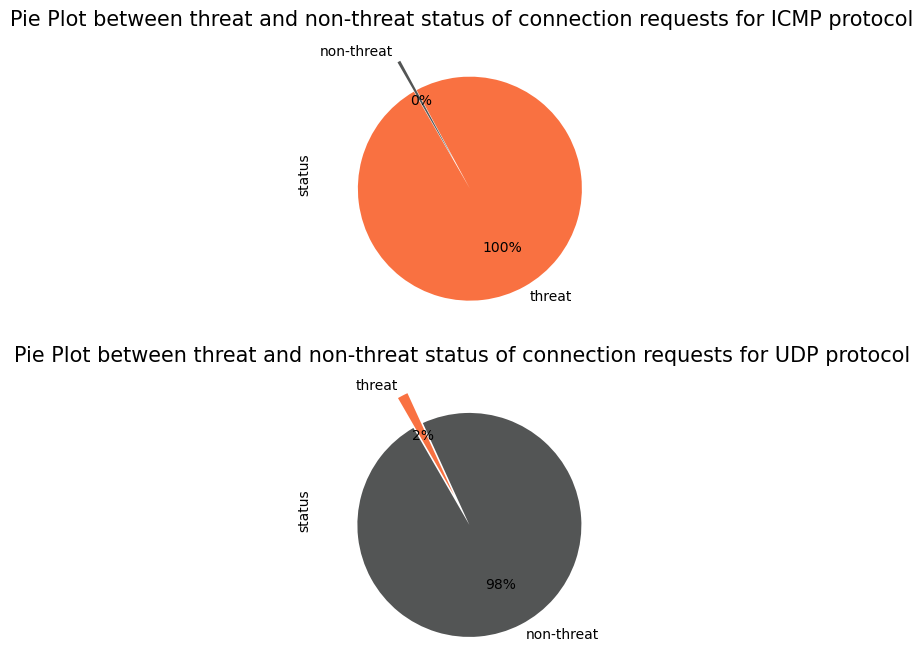

In [74]:
fig, axs = plt.subplots(2 ,1, figsize = (10,8))
explode = (0.15, 0.15)
plt.title('Pie Plot between threat and non-threat status of connection requests for ICMP and UDP protocols', size=15)
axs[0].set_title('Pie Plot between threat and non-threat status of connection requests for ICMP protocol', size=15)
axs[1].set_title('Pie Plot between threat and non-threat status of connection requests for UDP protocol', size=15)

df.loc[df.protocol_type == 'icmp'].status.value_counts().plot(kind = 'pie', figsize = (10,8), ax = axs[0], colors=["#f97141","#535555"], autopct='%1.0f%%', explode = explode, startangle=120)
df.loc[df.protocol_type == 'udp'].status.value_counts().plot(kind = 'pie', figsize = (10,8), ax = axs[1], colors=["#535555","#f97141"], autopct='%1.0f%%', explode = explode, startangle=120)
# most of protocol type icmp are threats 

- **Almost all connection** requests made using **'icmp' protocol are threat.**
- **Majority of connection** requests made using **'udp' protocol are safe.**

### Bar plot of types of protocols used for connection requests

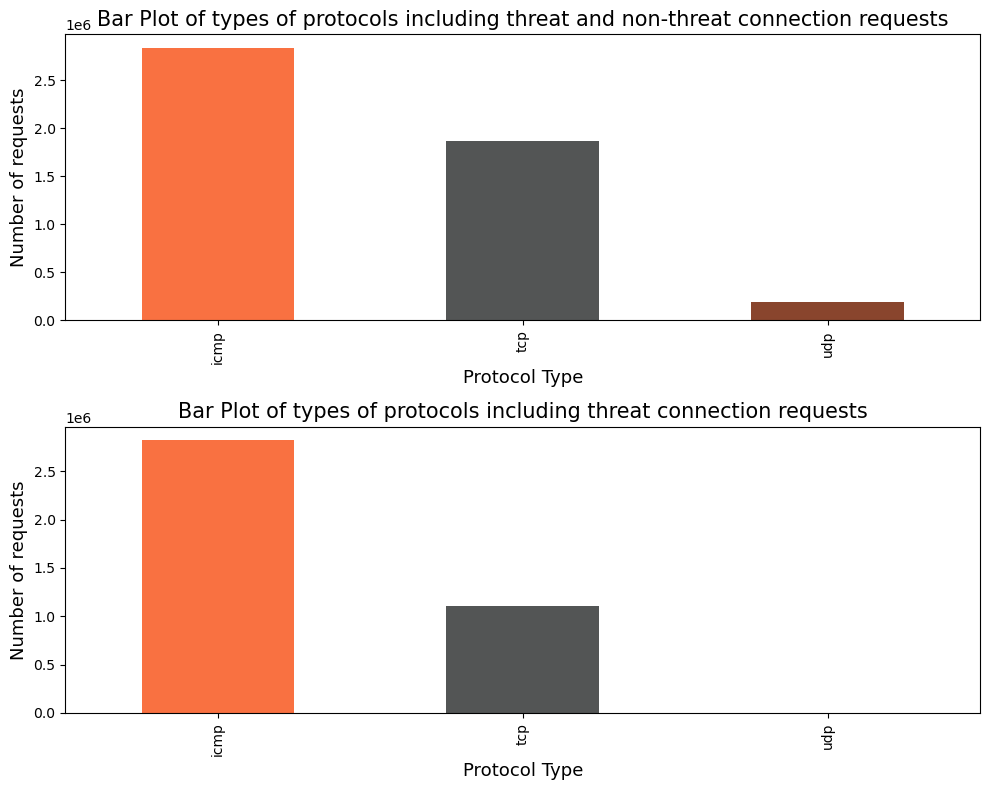

In [75]:
fig, axs = plt.subplots(2, 1, figsize = (10,8))
axs[0].set_title("Bar Plot of types of protocols including threat and non-threat connection requests", size=15)
axs[0].set_xlabel('Protocol Type', size=13)
axs[0].set_ylabel('Number of requests', size=13)
axs[1].set_title("Bar Plot of types of protocols including threat connection requests", size=15)
axs[1].set_xlabel('Protocol Type', size=13)
axs[1].set_ylabel('Number of requests', size=13)
df.protocol_type.value_counts().plot(kind = 'bar', figsize = (10,8), ax = axs[0], color=packt_palette)
df.loc[df.status == 'threat'].protocol_type.value_counts().plot(kind = 'bar', figsize = (10,8), ax = axs[1], color=packt_palette)
fig.tight_layout()
plt.show()

- **Connection request** made using **'udp' protocol** are **mostly safe**.
- **Connection request** made using **'icmp' protocol** are **malicious**.

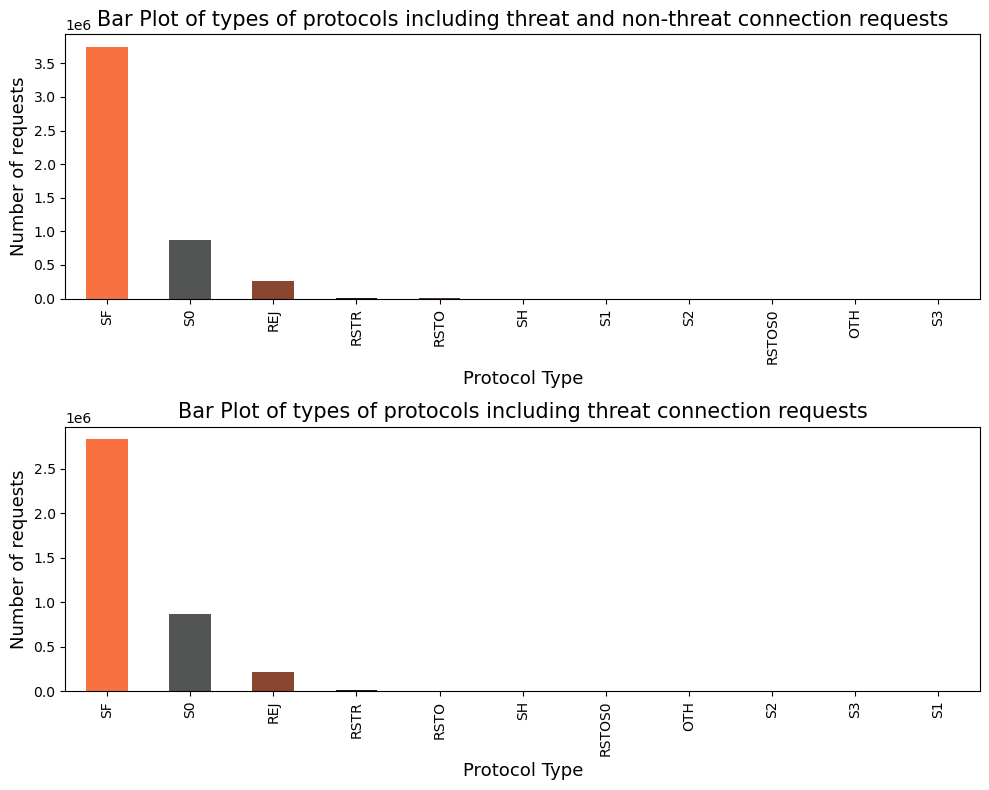

In [76]:
fig, axs = plt.subplots(2, 1, figsize = (10,8))
axs[0].set_title("Bar Plot of types of protocols including threat and non-threat connection requests", size=15)
axs[0].set_xlabel('Protocol Type', size=13)
axs[0].set_ylabel('Number of requests', size=13)
axs[1].set_title("Bar Plot of types of protocols including threat connection requests", size=15)
axs[1].set_xlabel('Protocol Type', size=13)
axs[1].set_ylabel('Number of requests', size=13)
df.flag.value_counts().plot(kind = 'bar', figsize = (10,8), ax = axs[0], color=packt_palette)
df.loc[df.status == 'threat'].flag.value_counts().plot(kind = 'bar', figsize = (10,8), ax = axs[1], color=packt_palette)
fig.tight_layout()

- **Connections requested** using **'SF' protocol** are **more porbable to be a threat.**

### Pie Plot of threat and non-threat connections based on flag type

<AxesSubplot:title={'center':'Pie Plot between threat and non-threat status of connection requests for S0 flag'}, ylabel='status'>

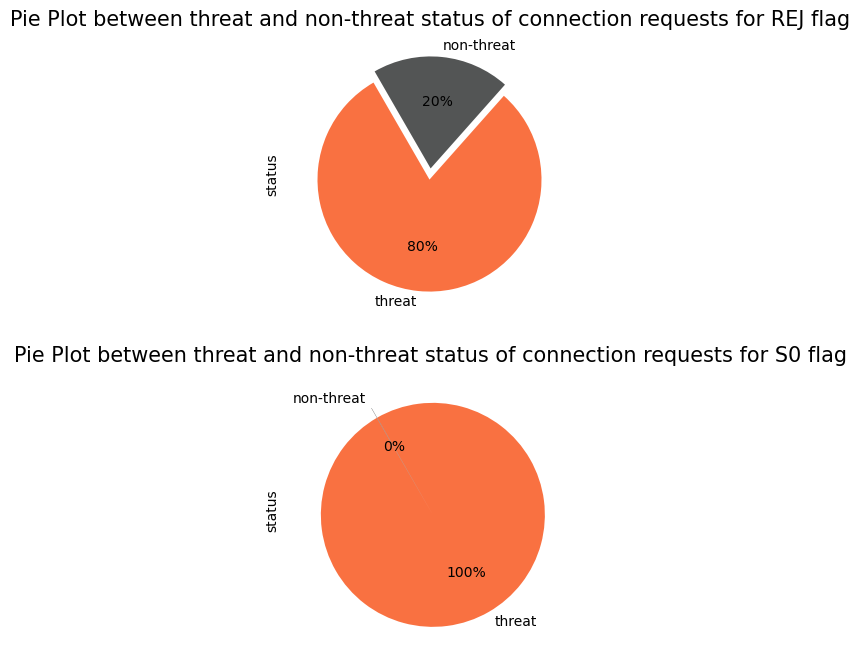

In [77]:
fig, axs = plt.subplots(2 ,1, figsize = (10,8))
explode = (0.05, 0.05)

axs[0].set_title('Pie Plot between threat and non-threat status of connection requests for REJ flag', size=15)
axs[1].set_title('Pie Plot between threat and non-threat status of connection requests for S0 flag', size=15)

df.loc[df.flag == 'REJ'].status.value_counts().plot(kind = 'pie', figsize = (10,8), colors=["#f97141","#535555"], ax = axs[0], autopct='%1.0f%%', explode = explode, startangle=120)
df.loc[df.flag == 'S0'].status.value_counts().plot(kind = 'pie', figsize = (10,8), ax = axs[1], colors=["#f97141","#535555"], autopct='%1.0f%%', explode = explode, startangle=120)

- **Connection requests flagged as 'S0' are always a threat.**
- **Connection requests flagged as 'REJ' are often a threat.**

### Bar Plot of connection requests with respect to their service

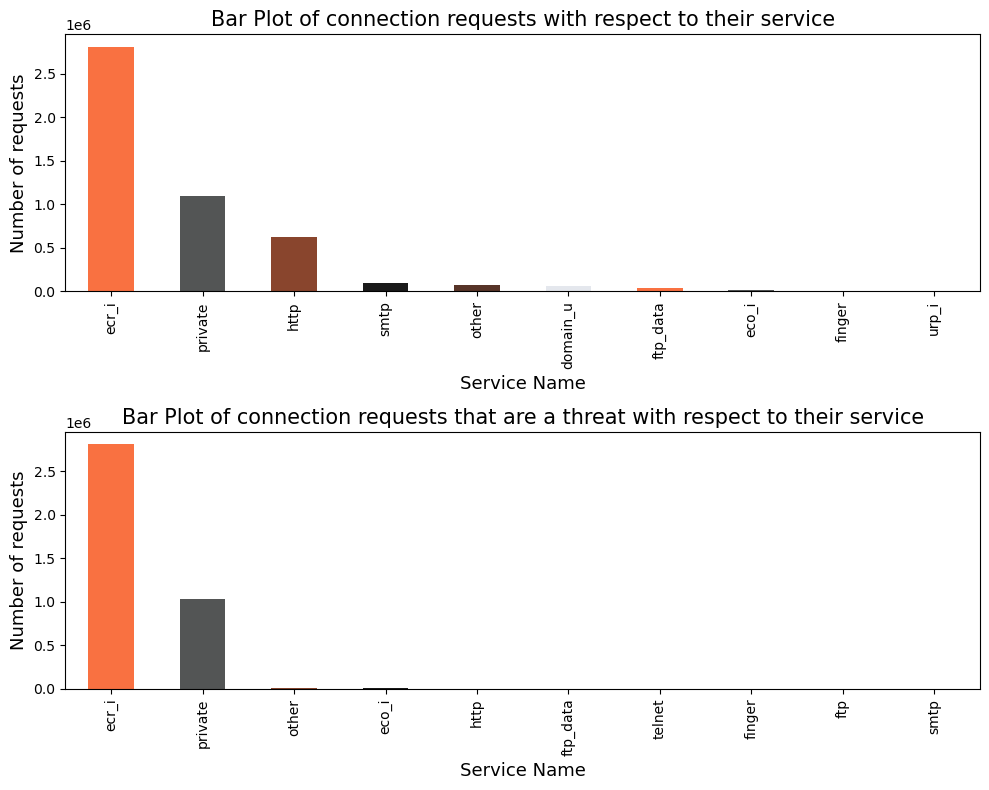

In [78]:
fig, axs = plt.subplots(2, 1, figsize = (10,8))
axs[0].set_title("Bar Plot of connection requests with respect to their service", size=15)
axs[0].set_xlabel('Service Name', size=13)
axs[0].set_ylabel('Number of requests', size=13)
axs[1].set_title("Bar Plot of connection requests that are a threat with respect to their service", size=15)
axs[1].set_xlabel('Service Name', size=13)
axs[1].set_ylabel('Number of requests', size=13)
df.service.value_counts()[:10].plot(kind = 'bar', figsize = (10,8), ax = axs[0], color=packt_palette)
df.loc[df.status == 'threat'].service.value_counts()[:10].plot(kind = 'bar', figsize = (10,8), ax = axs[1], color=packt_palette)
fig.tight_layout()

- **Connections requested using 'ecr_i' service are most likely to be a threat.**

<AxesSubplot:title={'center':"Pie Plot between threat and non-threat status of connection requests for 'http' Services"}, ylabel='status'>

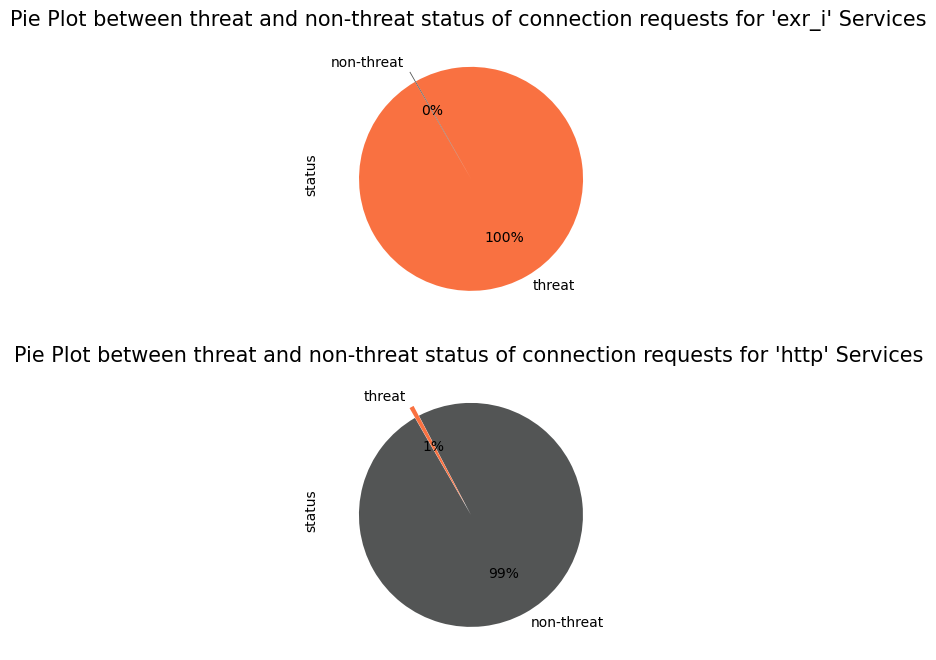

In [79]:
fig, axs = plt.subplots(2 ,1, figsize = (10,8))
explode = (0.05, 0.05)

axs[0].set_title("Pie Plot between threat and non-threat status of connection requests for 'exr_i' Services", size=15)
axs[1].set_title("Pie Plot between threat and non-threat status of connection requests for 'http' Services", size=15)

df.loc[df.service == 'ecr_i'].status.value_counts().plot(kind = 'pie', figsize = (10,8), ax = axs[0], colors=["#f97141","#535555"], autopct='%1.0f%%', explode = explode, startangle=120)
df.loc[df.service == 'http'].status.value_counts().plot(kind = 'pie', figsize = (10,8), ax = axs[1], colors=["#535555","#f97141"], autopct='%1.0f%%', explode = explode, startangle=120)
#most of the http seem to be non threat

- **Connection requests made using 'exr_i' service are always a threat.**
- **Connections requests made using 'http' service are often safe.**

### Count and plot of percentage distribution of various categorical variables

In [80]:
def plot_pert(feat):
    d1 = df.loc[df.output == 'normal.'][feat].value_counts()
    d2 = df[feat].value_counts()
    df2 = pd.concat([d1,d2], axis= 1)
    df2['pert'] = df2.iloc[:,0]/df2.iloc[:,1]*100
    df2 = df2.sort_values(by ='pert',ascending=False)
    plt.title('Percentage Distribution of various categorical values of {}'.format(feat), size=15)
    plt.xlabel('Categorical Values of {}'.format(feat), size=13)
    plt.ylabel('Percentage', size=13)
    df2.pert.plot(kind = 'bar', figsize = (10,8), color=packt_palette)
    display(df2.pert.head(5))
    return


S1     99.248120
S2     95.031056
S3     92.000000
SF     24.495931
OTH    22.807018
Name: pert, dtype: float64

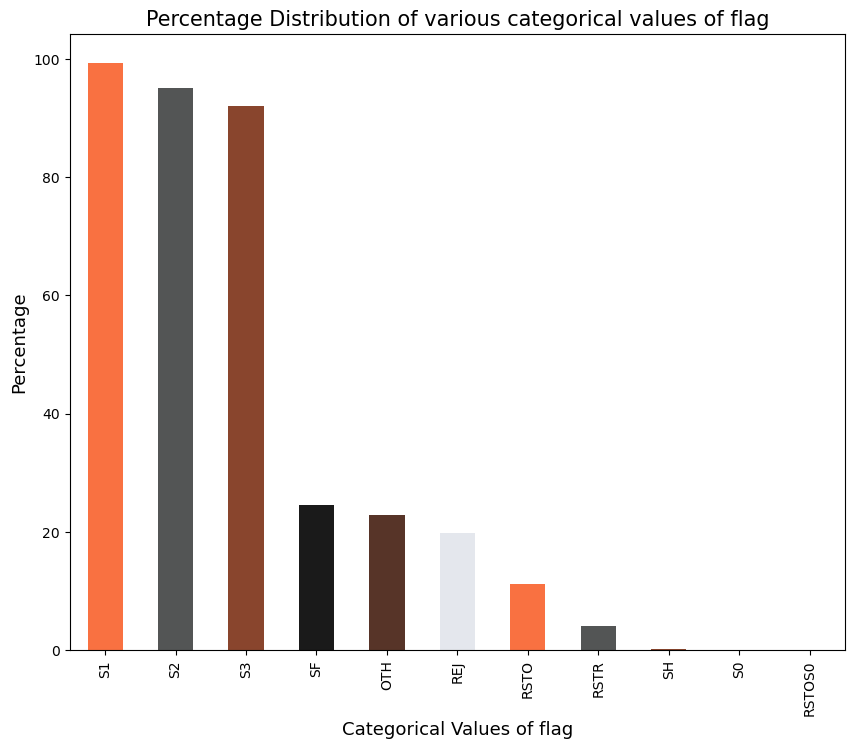

In [81]:
plot_pert('flag')

- **Most of the connections are flagged as 'S1', closely followed by 'S2' and 'S3' respectively.

tftp_u      100.000000
ntp_u       100.000000
red_i       100.000000
urh_i       100.000000
domain_u     99.984424
Name: pert, dtype: float64

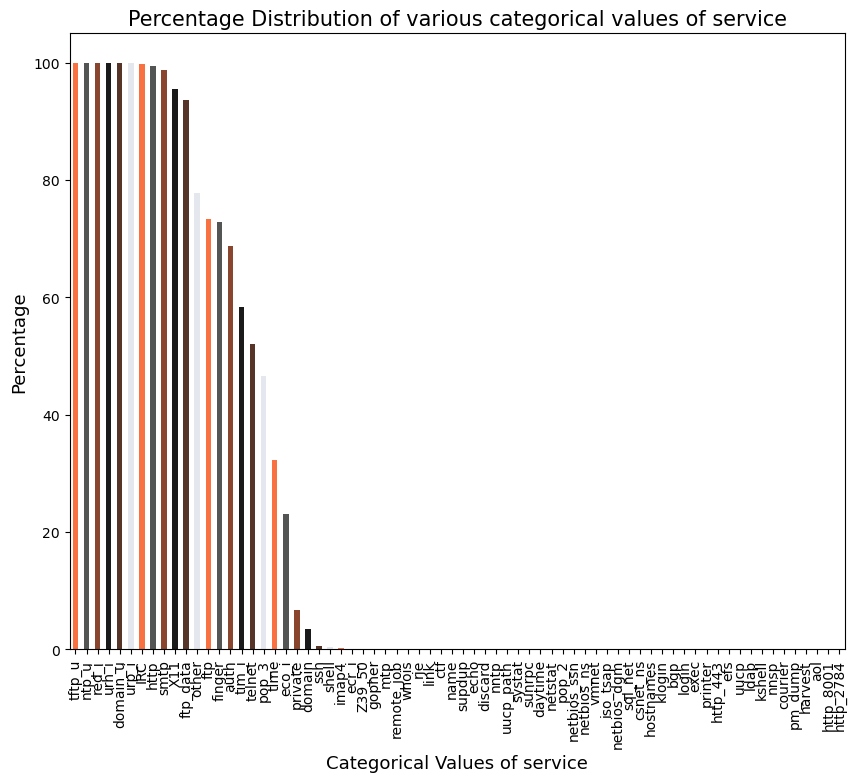

In [82]:
plot_pert('service')

- **Categorical values of services** is almost **evenly distributed** amongst all values.

udp     98.486783
tcp     41.092207
icmp     0.450425
Name: pert, dtype: float64

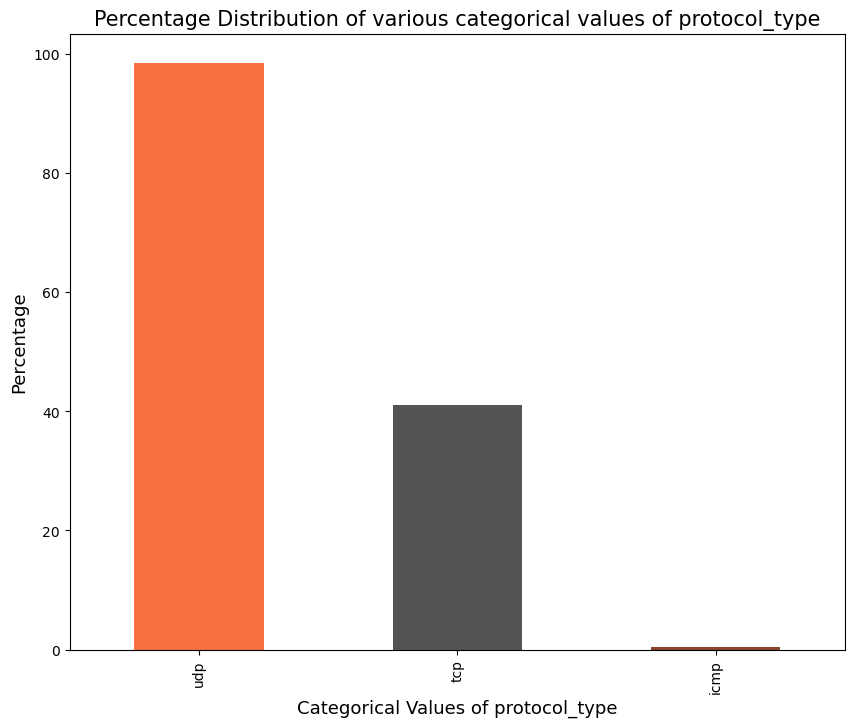

In [83]:
plot_pert('protocol_type')

- **Majority of connection requests are made using 'udp' protocol.**

1    99.519676
0     6.509352
Name: pert, dtype: float64

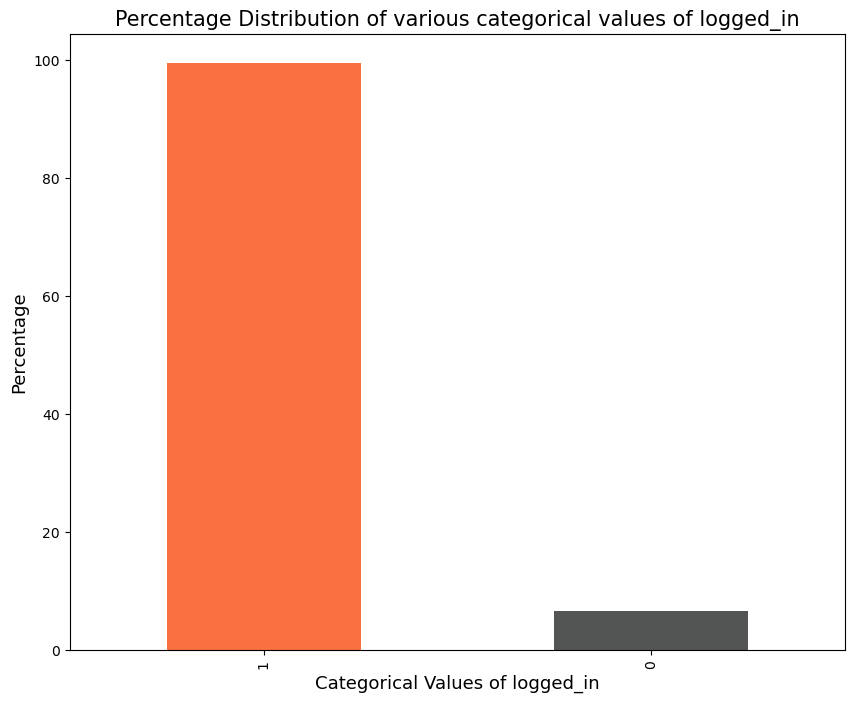

In [84]:
plot_pert('logged_in')

- **Most of the connection requests were made with user logged in.**

1    98.587571
2    40.000000
0    19.853322
Name: pert, dtype: float64

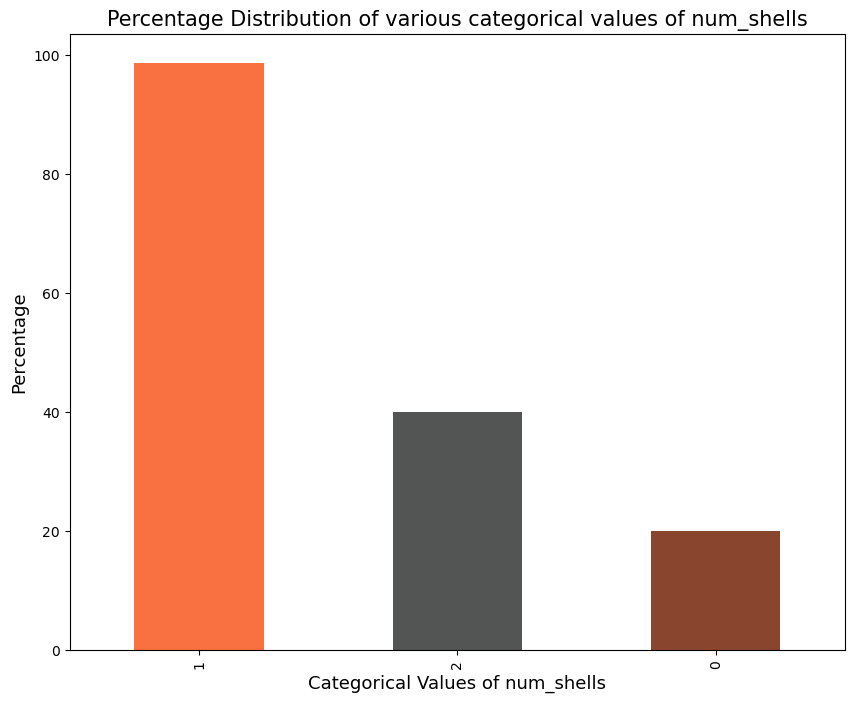

In [85]:
plot_pert('num_shells')

#### Box Plot for num_compromised

C:\Users\AnshulRanade\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='num_compromised'>

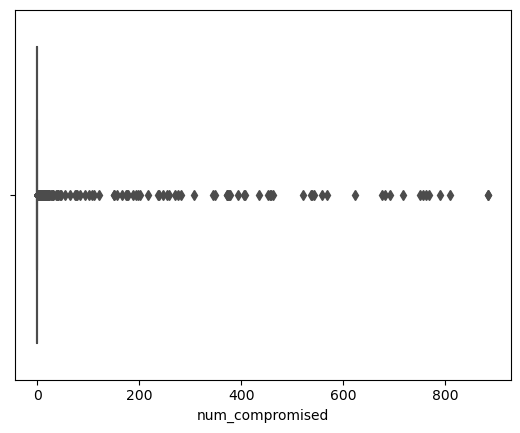

In [86]:
sns.boxplot(df['num_compromised'].loc[df['num_compromised']<1000], color='orange')

- **This plot depicts that the mean number of num_compromised is 0.**

### Box Plot for the number of file creations

C:\Users\AnshulRanade\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='num_file_creations'>

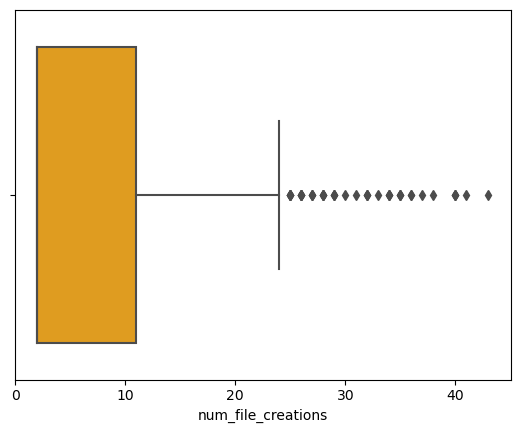

In [87]:
sns.boxplot(df['num_file_creations'].loc[df['num_file_creations']>1], color='orange')
# kdd['num_file_creations'].value_counts()

- **The box plot for num_file_creations reflects that major chunk of data has value between between 0 and 10, with the mean being around 25.**

### Box Plot for Count

C:\Users\AnshulRanade\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box Plot for Count')

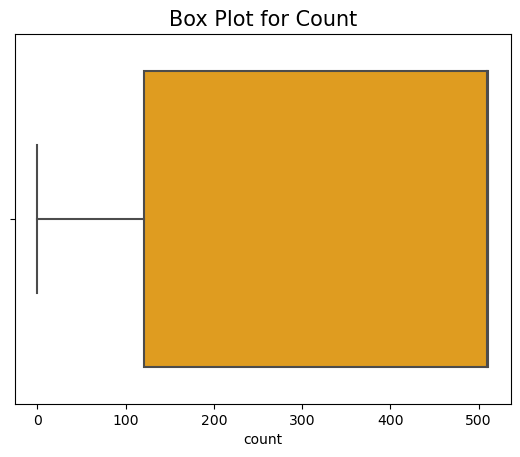

In [88]:
sns.boxplot(df['count'], color='orange')
plt.title('Box Plot for Count', size=15)

- **Major part of data has value for count between 110 and 510.**

In [89]:
df['nsl'] = np.log1p(df['num_shells'])

<AxesSubplot:xlabel='num_compromised', ylabel='status'>

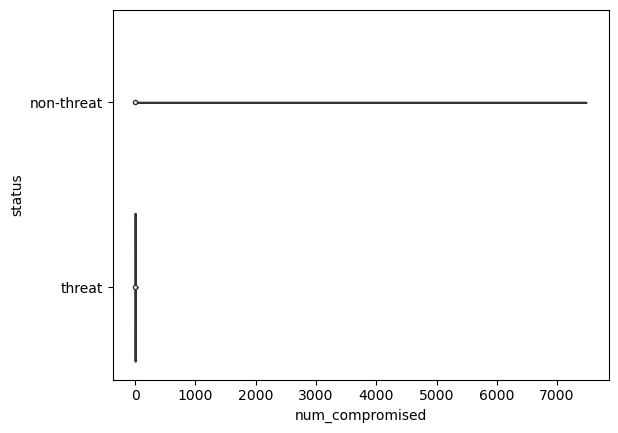

In [90]:
sns.violinplot(data=df, x="num_compromised", y="status")

### Density Estimate Plot for count variable

<AxesSubplot:xlabel='count', ylabel='Density'>

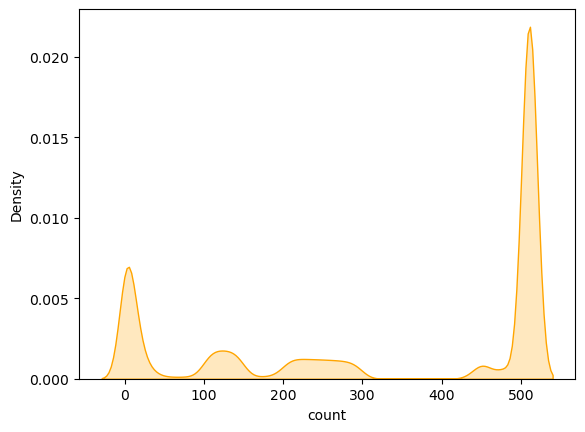

In [91]:
sns.kdeplot(x = df['count'], color='orange', fill=True)

- **The density estimate plot of count depicts that most of the data has value for count around 500 and 0.**

In [92]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                            object
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                       object
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                   object
is_guest_login                  object
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

### Encoding for various services in the dataset

In [93]:
labels=df['service'].unique()
values=[]
for i in labels:
    values.append(len(df.loc[(df['service']==i)]))

ar=sorted(list(zip(values,labels)),reverse=True)
for i in ar:
    print("{} : {}".format(i[1],i[0]),end=",")

ecr_i : 2811660,private : 1100831,http : 623091,smtp : 96554,other : 72653,domain_u : 57782,ftp_data : 40697,eco_i : 16338,finger : 6891,urp_i : 5378,ftp : 5214,telnet : 4277,ntp_u : 3833,auth : 3382,pop_3 : 1981,time : 1579,domain : 1113,Z39_50 : 1078,gopher : 1077,mtp : 1076,ssh : 1075,whois : 1073,remote_job : 1073,rje : 1070,link : 1069,imap4 : 1069,ctf : 1068,name : 1067,supdup : 1060,nntp : 1059,echo : 1059,discard : 1059,uucp_path : 1057,systat : 1056,sunrpc : 1056,netstat : 1056,daytime : 1056,pop_2 : 1055,netbios_ssn : 1055,netbios_ns : 1054,vmnet : 1053,sql_net : 1052,netbios_dgm : 1052,iso_tsap : 1052,shell : 1051,csnet_ns : 1051,klogin : 1050,hostnames : 1050,bgp : 1047,printer : 1045,login : 1045,exec : 1045,http_443 : 1044,efs : 1042,uucp : 1041,ldap : 1041,kshell : 1040,nnsp : 1038,courier : 1021,IRC : 521,urh_i : 148,X11 : 135,tim_i : 12,red_i : 9,pm_dump : 5,tftp_u : 3,http_8001 : 2,harvest : 2,aol : 2,http_2784 : 1,

In [94]:
ser_c=[]
for i in ar[11:]:
    ser_c.append(i[1])
df['service']=df['service'].replace(ser_c,'cc')

In [95]:
df['service'].unique()

array(['http', 'smtp', 'domain_u', 'cc', 'finger', 'eco_i', 'ftp',
       'ecr_i', 'other', 'urp_i', 'private', 'ftp_data'], dtype=object)

In [96]:
x_df=df.drop(['output'],axis=1)

In [97]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()

In [98]:
x_df["service_c"] = ord_enc.fit_transform(x_df[["service"]])
x_df["protocol_type_c"] = ord_enc.fit_transform(x_df[["protocol_type"]])
x_df["flag_c"] = ord_enc.fit_transform(x_df[["flag"]])

print(x_df['service_c'].unique())
print(x_df['protocol_type_c'].unique())
print(x_df['flag_c'].unique())

[ 7. 10.  1.  0.  4.  2.  5.  3.  8. 11.  9.  6.]
[1. 2. 0.]
[ 9.  7.  6.  8.  0.  1.  2.  5.  4.  3. 10.]


In [99]:
d_rel=x_df.drop(['service','protocol_type','flag'],axis=1)

In [100]:
d_rel.dtypes

duration                         int64
src_bytes                        int64
dst_bytes                        int64
land                            object
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                       object
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                   object
is_guest_login                  object
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate                float64
rerror_rate                    float64
srv_rerror_rate                float64
same_srv_rate            

### Heatmap of features following encoding

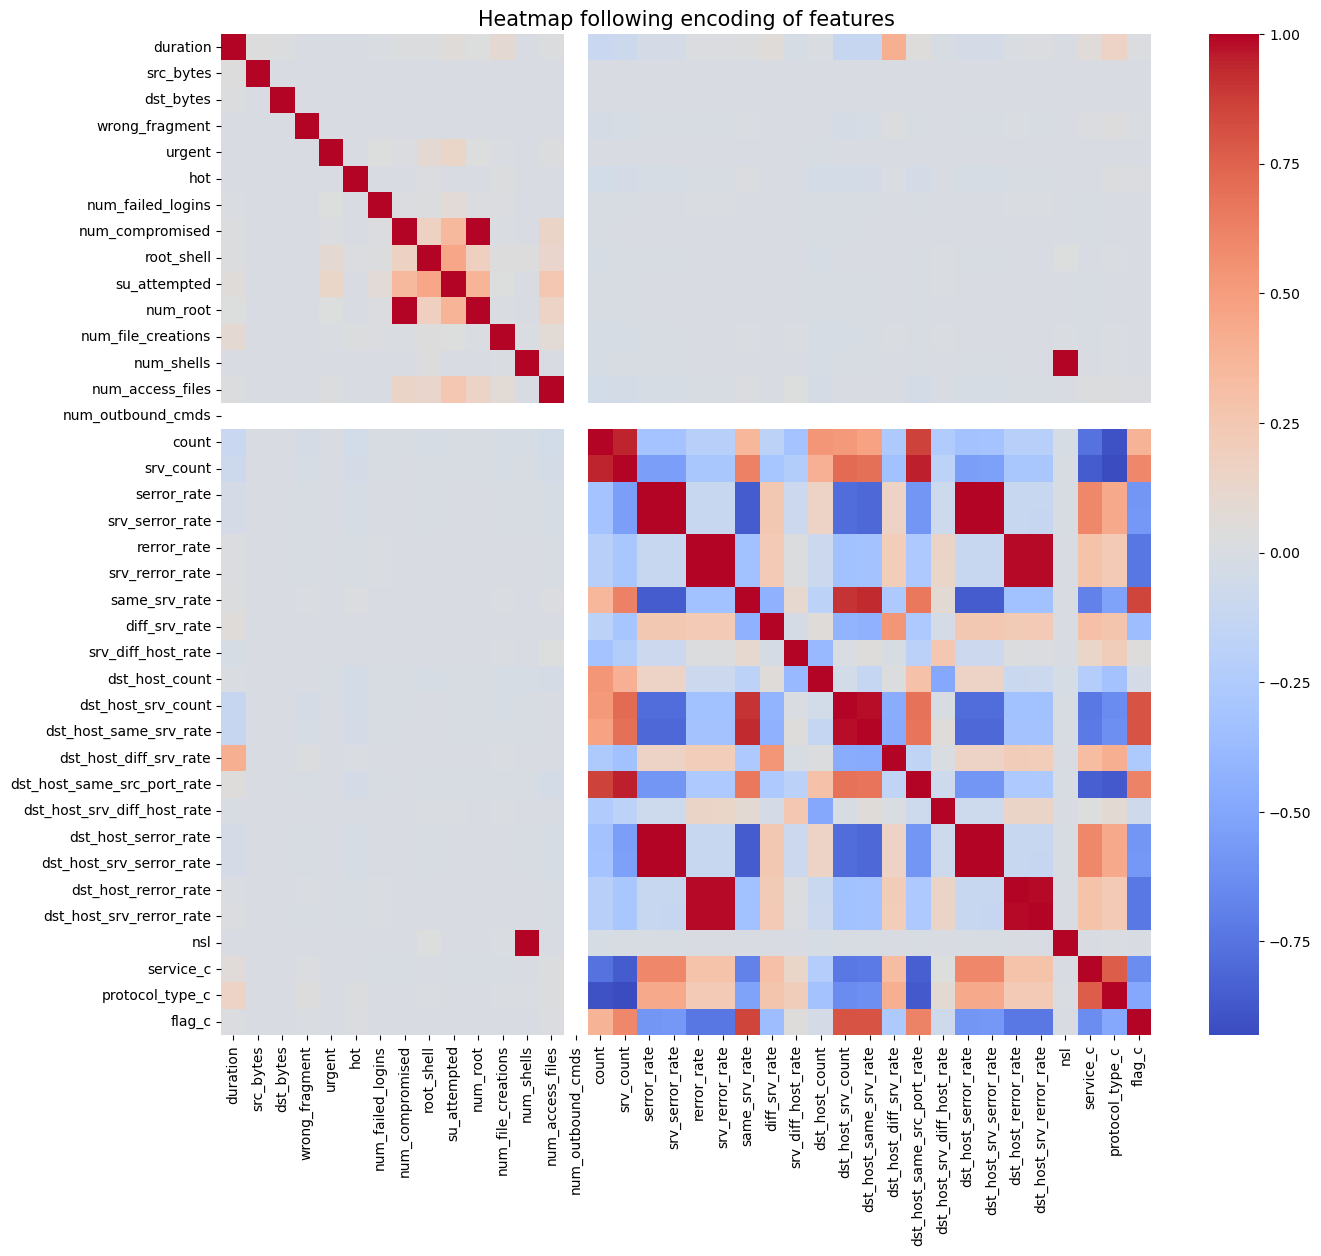

In [101]:
plt.figure(figsize=(15,13))
cor=d_rel.corr()
sns.heatmap(cor, cmap='coolwarm')
plt.title('Heatmap following encoding of features', size=15)
plt.show()

In [102]:
cor_col=set()
for i in range(len(cor.columns)):
    for j in range(i):
        if (cor.iloc[i,j])>0.8:
            temp=cor.columns[i]
            cor_col.add(temp)

In [103]:
print(cor_col)
print(len(cor_col))

{'dst_host_serror_rate', 'nsl', 'flag_c', 'srv_serror_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_rerror_rate', 'num_root', 'srv_rerror_rate', 'srv_count', 'dst_host_rerror_rate', 'dst_host_srv_serror_rate'}
13


## Statistical overview of the dataset

In [104]:
df.describe().round(3)

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,nsl
count,4898431.000,4.898431e+06,4.898431e+06,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,...,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000
mean,48.342,1.834621e+03,1.093623e+03,0.001,0.000,0.012,0.000,0.008,0.000,0.000,...,189.214,0.754,0.031,0.605,0.006,0.178,0.178,0.058,0.058,0.000
std,723.330,9.414311e+05,6.450123e+05,0.043,0.007,0.469,0.007,3.856,0.008,0.008,...,105.913,0.411,0.109,0.481,0.041,0.382,0.382,0.231,0.231,0.006
min,0.000,0.000000e+00,0.000000e+00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,4.500000e+01,0.000000e+00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,49.000,0.410,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.000,5.200000e+02,0.000000e+00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,255.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.000,1.032000e+03,0.000000e+00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,255.000,1.000,0.040,1.000,0.000,0.000,0.000,0.000,0.000,0.000
max,58329.000,1.379964e+09,1.309937e+09,3.000,14.000,77.000,5.000,7479.000,1.000,2.000,...,255.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.099


## Feature Engineering to determine correlation between features

In [105]:
# Determining correlation between all features of dataset
corrMatrix = df_feat.corr().round(3)

### Heatmap of correlation between all features

Text(0.5, 1.0, 'Heatmap of Correlation between all features')

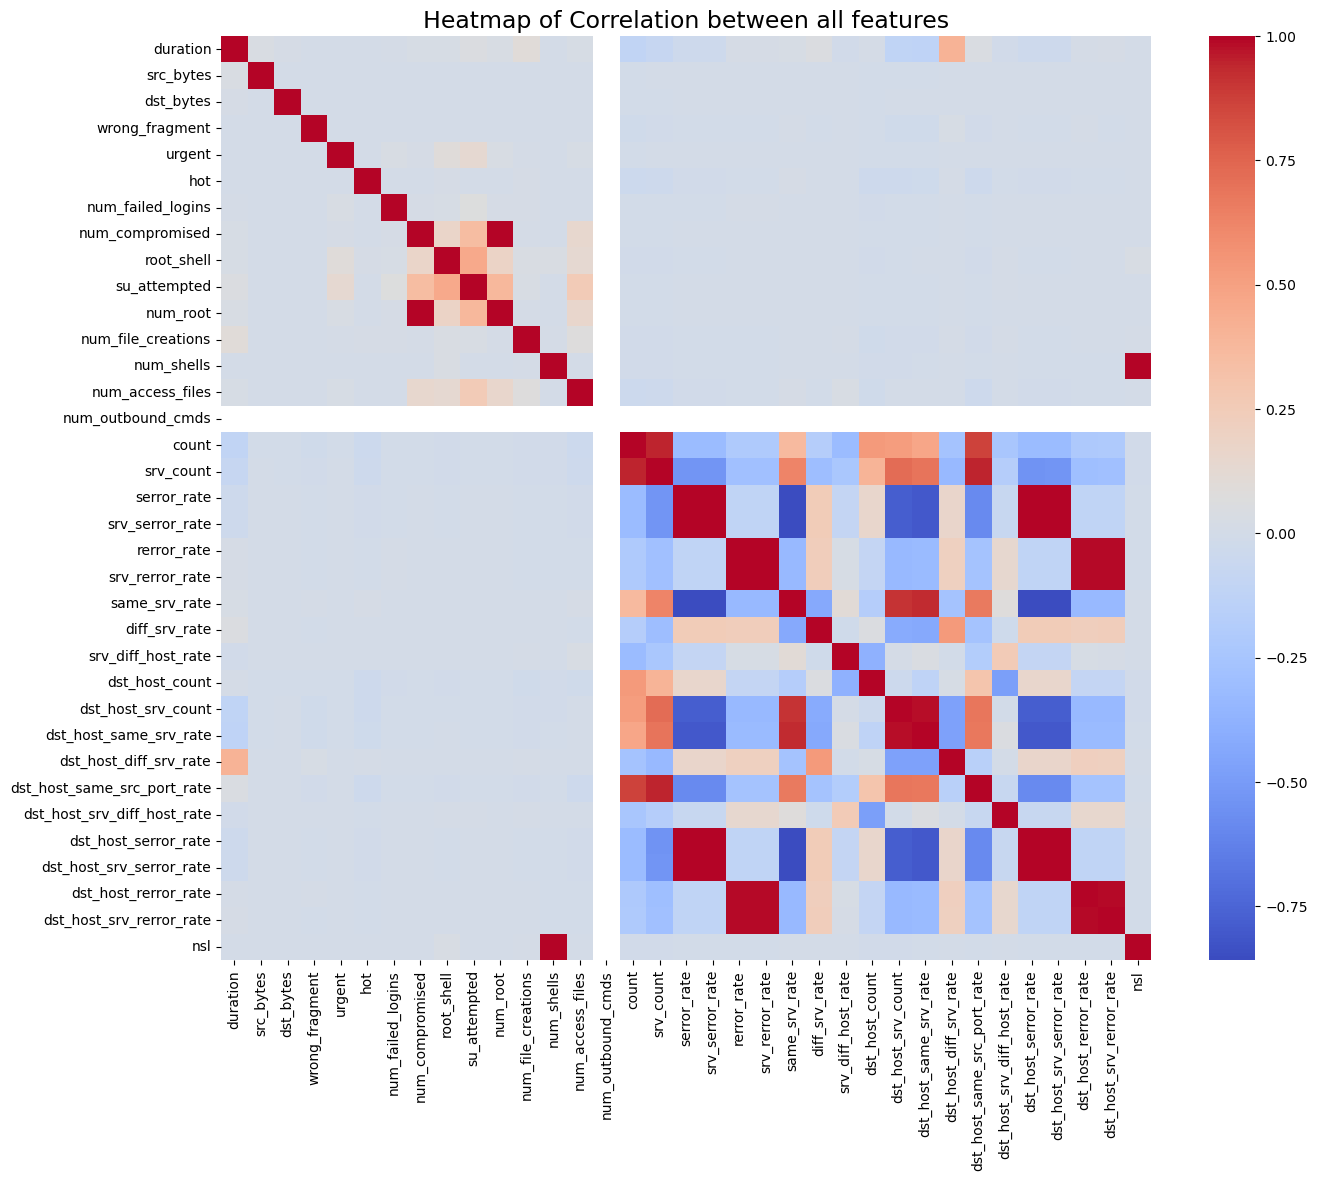

In [106]:
plt.figure(figsize=(15, 12))
sns.heatmap(corrMatrix, cmap='coolwarm')
plt.title("Heatmap of Correlation between all features", size=17)

### Exploring dependent features in the dataset

In [107]:
correlated_features = set()
for i in range(len(corrMatrix.columns)):
    for j in range(i):
        if abs(corrMatrix.iloc[i][j]) > 0.8 :
            column_name = corrMatrix.columns[i]
            correlated_features.add(column_name)
            
print("Here are the dependent features")
print(correlated_features)

Here are the dependent features
{'dst_host_serror_rate', 'nsl', 'srv_serror_rate', 'dst_host_srv_count', 'same_srv_rate', 'dst_host_same_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_rerror_rate', 'num_root', 'srv_rerror_rate', 'srv_count', 'dst_host_rerror_rate', 'dst_host_srv_serror_rate'}


In [108]:
df.drop(correlated_features, inplace=True, axis=1)

In [109]:
df.shape

(4898431, 31)

In [110]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
       'serror_rate', 'rerror_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_diff_srv_rate',
       'dst_host_srv_diff_host_rate', 'output', 'status'],
      dtype='object')

In [111]:
# Correlation Matrix following removal of dependent features from the dataset
corrMatrix = df.corr().round(3)
corrMatrix

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,...,num_access_files,num_outbound_cmds,count,serror_rate,rerror_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_diff_srv_rate,dst_host_srv_diff_host_rate
duration,1.000,0.041,0.020,-0.001,0.004,0.004,0.007,0.027,0.026,0.052,...,0.024,NaN,-0.105,-0.031,0.017,0.050,-0.013,0.011,0.409,-0.009
src_bytes,0.041,1.000,0.000,-0.000,-0.000,0.001,-0.000,0.000,-0.000,-0.000,...,-0.000,NaN,-0.002,-0.001,0.003,0.000,-0.000,-0.002,0.001,0.000
dst_bytes,0.020,0.000,1.000,-0.000,0.000,0.000,0.001,0.001,0.001,0.001,...,0.000,NaN,-0.003,-0.001,0.002,-0.000,0.000,-0.002,0.003,0.000
wrong_fragment,-0.001,-0.000,-0.000,1.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,...,-0.000,NaN,-0.020,-0.004,-0.004,-0.002,0.000,-0.002,0.023,0.004
urgent,0.004,-0.000,0.000,-0.000,1.000,0.004,0.031,0.018,0.089,0.133,...,0.024,NaN,-0.002,-0.001,-0.000,-0.000,-0.000,-0.003,0.002,0.003
hot,0.004,0.001,0.000,-0.000,0.004,1.000,0.004,0.003,0.018,0.002,...,0.001,NaN,-0.042,-0.012,-0.006,0.004,-0.000,-0.036,0.009,-0.003
num_failed_logins,0.007,-0.000,0.001,-0.000,0.031,0.004,1.000,0.020,0.024,0.069,...,0.001,NaN,-0.007,-0.002,0.006,0.001,-0.001,-0.010,0.002,0.004
num_compromised,0.027,0.000,0.001,-0.000,0.018,0.003,0.020,1.000,0.172,0.350,...,0.144,NaN,-0.003,-0.001,-0.000,-0.000,-0.000,-0.005,0.002,0.003
root_shell,0.026,-0.000,0.001,-0.000,0.089,0.018,0.024,0.172,1.000,0.456,...,0.132,NaN,-0.013,-0.003,-0.001,-0.001,0.001,-0.011,0.001,0.009
su_attempted,0.052,-0.000,0.001,-0.000,0.133,0.002,0.069,0.350,0.456,1.000,...,0.259,NaN,-0.007,-0.001,-0.000,-0.001,-0.000,-0.008,0.003,0.006


### Heatmap of correlation between features following feature extraction

Text(0.5, 1.0, 'Heatmap of Correlation between features of dataset after removing correlated features')

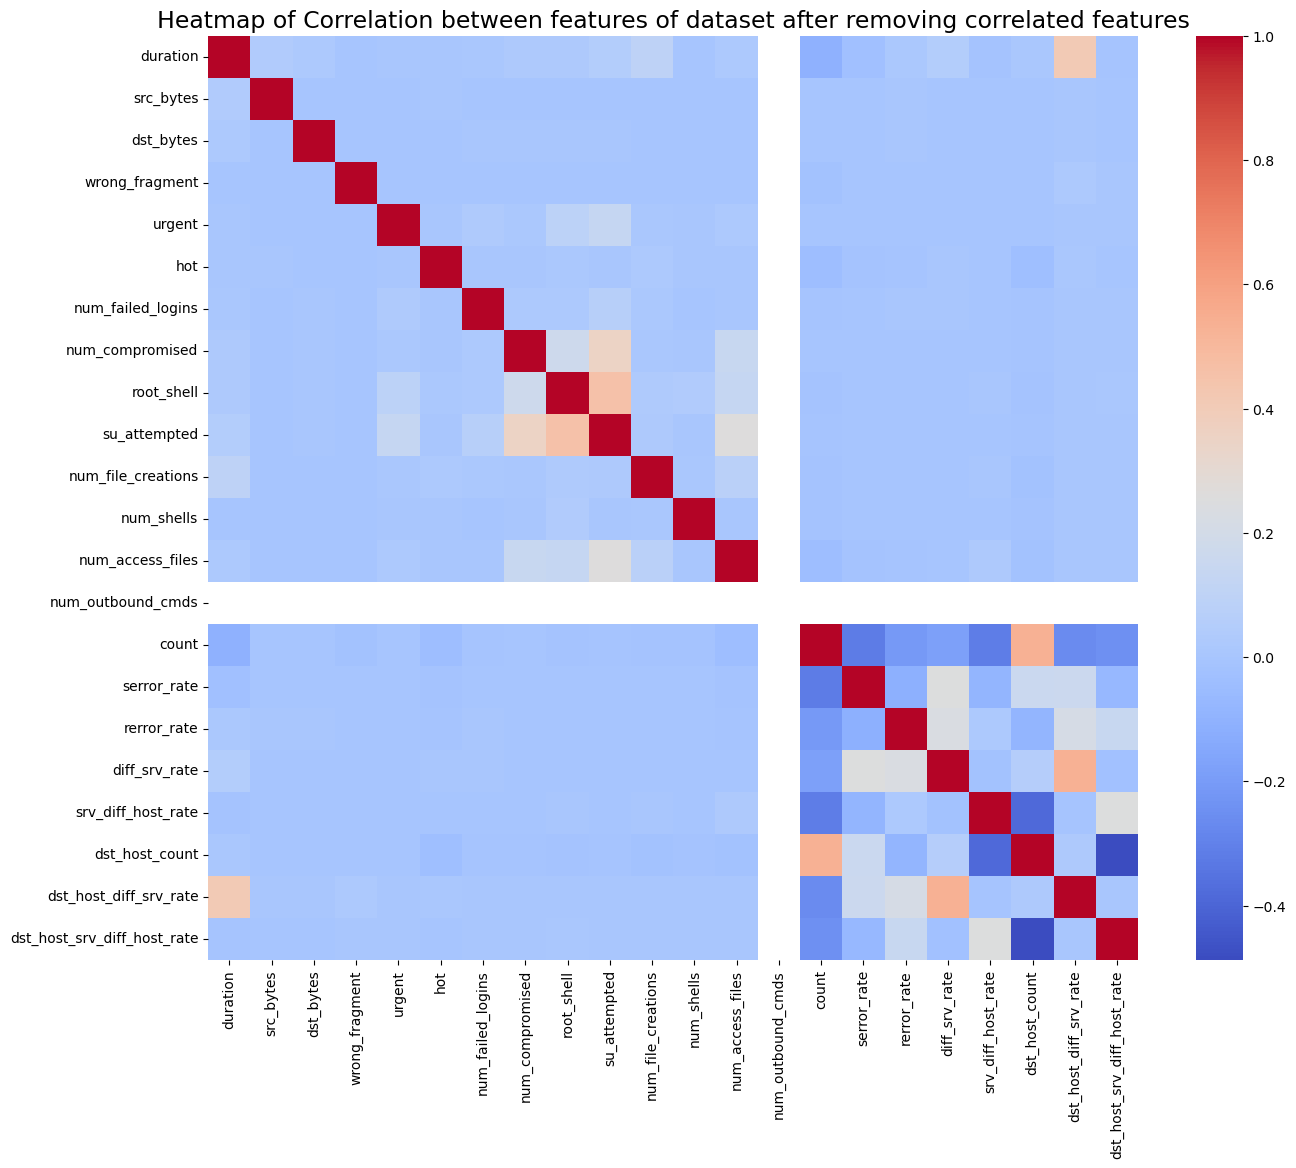

In [112]:
plt.figure(figsize=(15,12))
sns.heatmap(corrMatrix, cmap='coolwarm')
plt.title("Heatmap of Correlation between features of dataset after removing correlated features", size=17)

### Determining the position of least correlation for each feature

In [113]:
minCorr = corrMatrix.idxmin()
print('The least value each feature posesses with respect to other features\n--------------------------------------------------------------------')
print(minCorr)

The least value each feature posesses with respect to other features
--------------------------------------------------------------------
duration                                             count
src_bytes                                            count
dst_bytes                                            count
wrong_fragment                                       count
urgent                                      dst_host_count
hot                                                  count
num_failed_logins                           dst_host_count
num_compromised                             dst_host_count
root_shell                                           count
su_attempted                                dst_host_count
num_file_creations                          dst_host_count
num_shells                                  dst_host_count
num_access_files                                     count
num_outbound_cmds                                      NaN
count                               

### Determining the least value for correlation of each feature

In [114]:
minValues = corrMatrix.min()
print('The least value for correlation each feature posesses\n-----------------------------------------------------')
print(minValues)

The least value for correlation each feature posesses
-----------------------------------------------------
duration                      -0.105
src_bytes                     -0.002
dst_bytes                     -0.003
wrong_fragment                -0.020
urgent                        -0.003
hot                           -0.042
num_failed_logins             -0.010
num_compromised               -0.005
root_shell                    -0.013
su_attempted                  -0.008
num_file_creations            -0.017
num_shells                    -0.014
num_access_files              -0.045
num_outbound_cmds                NaN
count                         -0.319
serror_rate                   -0.319
rerror_rate                   -0.211
diff_srv_rate                 -0.180
srv_diff_host_rate            -0.384
dst_host_count                -0.487
dst_host_diff_srv_rate        -0.266
dst_host_srv_diff_host_rate   -0.487
dtype: float64


# Conclusion from exploratory data analysis of the dataset

- This dataset does not have **normal distribution**.
- It is **highly skewed towards left.**
- The dataset **requires balancing techniques** to be applied **before using for model development.**
- There are **not many correlated features** in the dataset. Most of the features are independent of each other.
- The statistical difference in the full dataset and 10% dataset is negligible.